# 3 Neighbourhood Recursive Cellular Automata Notebook
### A three neighborhood cellular automata that updates both it's state and rule with the transtition function such that state = rule.

In [4]:
!pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance

sym.init_printing()
from IPython.display import display

## Definition of RCA component functions

In [6]:
# Define the functions for the cellular automata

#Convert decimal state number to a binary array
def decimalToBinaryArray(decimal, binaryArray):
    binary = np.binary_repr(decimal, width=len(binaryArray))
    for i in range(len(binaryArray)):
        binaryArray[i] = int(binary[i])
        
    return binaryArray

#convert an array representing a binary number to a single decimal representing that number
def binaryArrayToDecimal(binaryArray):
    decimal = 0
    for i in range(len(binaryArray)):
        decimal += binaryArray[i] * 2**(len(binaryArray)-i-1)
    return decimal


## RCA transition function components

In [7]:
# A function that update the individual cell state based on the values of its neighbor cells, necessary component of the transition function
def updater(a:int, b: int, c: int) -> int:
    ruleelement = a * 4 + b * 2 + c
    return ruleelement

#Cellular Automata time evolution/update/transition function

def update_RCA(inputGlobalState):
    # Update the RCA global state for one time step, note that one update/evolution represents a discrete time step of delta_t = 1
    width = 8 # Assume the length of cellspace is 8
    neighbourhoodwidth = 3 # Assume the neighbourhood width is 3
    updatedcellspace = [0] * width # Initialize the updated cellspace
    updatedCellState = 0 # Initialize a variable to hold the updated cell state
    rulespace = inputGlobalState #setting the rule to be the same as the global state
    outputGlobalState = [0] * width #initalising the output global state which will be returned
    
    #loop over all of the cells of the global state and perform the updater function
    for i in range(width):
        # To give CA circular topology will need to use specific conditions, setting the neighbors appropriately at the boundaries
        if i == 0:
            leftNeighbour = inputGlobalState[width - 1]
            centerNeighbour = inputGlobalState[0]
            rightNeighbour = inputGlobalState[1]
            updatedCellState = updater(leftNeighbour, centerNeighbour, rightNeighbour)
            updatedcellspace[i] = rulespace[updatedCellState]
            #i+=1
        elif i == width - 1:
            leftNeighbour = inputGlobalState[width - 1]
            centerNeighbour = inputGlobalState[i]
            rightNeighbour = inputGlobalState[0]
            updatedCellState = updater(leftNeighbour, centerNeighbour, rightNeighbour)
            updatedcellspace[i] = rulespace[updatedCellState]
            #i+=1
        else:
            leftNeighbour = inputGlobalState[i-1]
            centerNeighbour = inputGlobalState[i]
            rightNeighbour = inputGlobalState[i+1]
            updatedCellState = updater(leftNeighbour, centerNeighbour, rightNeighbour)
            updatedcellspace[i] = rulespace[updatedCellState]
    # Setting output global state before returned
    
        outputGlobalState = updatedcellspace
    
    return outputGlobalState


## Declaration of the state that we will operate on and any other associated variables

In [8]:
# initialisation of starting state and state variables
stateNumberAsADecimal = 1
state = [0] *8
stateNumberAsADecimal = 0


## Definition of the RCA iterator function for a given input set
### To be used with the set of Garden of Edens. This function produces a graph of the time evolutions of the specified input sets. It currently produces all of the interesting data.

In [9]:
def iterateTheRCAThroughAllTheGivenStartingPoints(inputSet):
    # definind a variable to track the longest transient length
    longestTransientLength = 0
    # Create a directed graph
    G = nx.DiGraph()
    dictionaryOfInputAndTransientLength = {}
    
    for i in inputSet:
        initialStateDecimal = i
        initialState= [0]*8
        initialState = decimalToBinaryArray(initialStateDecimal, initialState)
        outputState = [1] * 8
        priorState = [1] * 8
        currentState = initialState
        currentStateDecimal = initialStateDecimal
        
        # add variables to collect data about the trajectories
        transientLength = 0
        # initialising a new graph of this particular trajectory
        graphOfTrajectory = nx.DiGraph()
        
        # code to test correct functionaluty, can ignore
        #print(f'Starting state is {currentStateDecimal}')
        #print(binaryArrayToDecimal(currentState))
        
        #TIME EVOLUTION: looping through the iterations from the starting state until it reaches attracting point
        while priorState != currentState:
            priorState = currentState
            outputState = update_RCA(currentState)
            
            #adding nodes to graph with hamming distance as weight
            G.add_edge(binaryArrayToDecimal(currentState),binaryArrayToDecimal(outputState),weight=distance.hamming(currentState,outputState))
            graphOfTrajectory.add_edge(binaryArrayToDecimal(currentState),binaryArrayToDecimal(outputState),weight=distance.hamming(currentState,outputState))
            
            #print(binaryArrayToDecimal(outputState))
            currentState = outputState
            transientLength += 1
        
        if longestTransientLength < transientLength:
            longestTransientLength = transientLength
            
        #print(f'The time-evolution terminated at {binaryArrayToDecimal(outputState)} with a transient length of {transientLength} timesteps.')
        dictionaryOfInputAndTransientLength[f'For inital state {i}'] = f'the transient length was {transientLength}'
        
        # Create a large plot
        plt.figure()
    
    
        # Compute the positions of the nodes using the spring layout algorithm
        pos = nx.spring_layout(G, k=5)

        # Draw the graph with smaller node sizes to fit in the plot
        nx.draw(graphOfTrajectory, pos, with_labels=True, node_size=300, node_color = 'red')

        # Get edge weights and add them as labels
        edge_labels = nx.get_edge_attributes(graphOfTrajectory, 'weight')

        # Draw edge labels using node positions
        nx.draw_networkx_edge_labels(graphOfTrajectory, pos, edge_labels=edge_labels)

        plt.title(f'Graph of {i} trajectory')
        

        plt.show()
    
        #####

    print(f'The longest transient length was {longestTransientLength}.')
    
    
    # Visualise the graph of whole RCA state space
    # Create a large plot
    plt.figure(figsize=(30, 30))
    # Compute the positions of the nodes using the spring layout algorithm
    pos = nx.spring_layout(G, k=5)
    #   Draw the graph with smaller node sizes to fit in the plot
    nx.draw(G, pos, with_labels=True, node_size=300, node_color = 'red')
    # Get edge weights and add them as labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.title(f'Graph of trajectories through state space')
    plt.show()
    
    
    #print the dictionary of starting state and transient length
    for key, value in dictionaryOfInputAndTransientLength.items():
        print(f'{key}: {value}')
        

    
    #Graph theory metrics 
    
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)
    # Find the node with the highest degree centrality
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    # Print the node and its degree centrality
    print(f"Node: {max_degree_node} has the highest Degree Centrality: {degree_centrality[max_degree_node]}")
    




## Testing, initialising and updating the RCA

### Choose a starting state, perform updates in a separate cell 

In [10]:
# choosing a starting state
state = decimalToBinaryArray(91, state)
print(state)
print(binaryArrayToDecimal(state))
print(update_RCA(state))

[0, 1, 0, 1, 1, 0, 1, 1]
91
[0, 0, 0, 1, 1, 0, 1, 1]


# Running the RCA for all possible starting points

## The RCA is ran from all possible $2^8$ starting configurations

In [11]:
setOfAttractorPoints = set()

for i in range(0,255):
    initialStateDecimal = i
    initialState= [0]*8
    initialState = decimalToBinaryArray(initialStateDecimal, initialState)
    outputState = [1] * 8
    priorState = [1] * 8
    currentState = initialState
    currentStateDecimal = initialStateDecimal

# We will also build a set of all of attractor states
    
    ##Stating the starting point
    
    print(f'Starting state is {currentStateDecimal}')

    print(binaryArrayToDecimal(currentState))
    while priorState != currentState:
        
        #setting a variable to remember the prior state
        priorState = currentState
        #producing the updated state as output State
        outputState = update_RCA(currentState)
  
        print(binaryArrayToDecimal(outputState))
        #setting the current state as output for the next iteration
        currentState = outputState
    
    # Update setOfAttractorPoints with the currentState
    setOfAttractorPoints.add(binaryArrayToDecimal(currentState))

        
        

    
        
        
print(f'There are {len(setOfAttractorPoints)} Attracting points')
print(setOfAttractorPoints)

Starting state is 0
0
0
Starting state is 1
1
0
0
Starting state is 2
2
0
0
Starting state is 3
3
1
0
0
Starting state is 4
4
0
0
Starting state is 5
5
2
0
0
Starting state is 6
6
2
0
0
Starting state is 7
7
3
1
0
0
Starting state is 8
8
4
0
0
Starting state is 9
9
132
48
32
32
Starting state is 10
10
0
0
Starting state is 11
11
129
61
186
170
170
Starting state is 12
12
2
0
0
Starting state is 13
13
130
56
36
36
Starting state is 14
14
2
0
0
Starting state is 15
15
135
179
179
Starting state is 16
16
0
0
Starting state is 17
17
0
0
Starting state is 18
18
0
0
Starting state is 19
19
3
1
0
0
Starting state is 20
20
8
4
0
0
Starting state is 21
21
10
0
0
Starting state is 22
22
14
2
0
0
Starting state is 23
23
15
135
179
179
Starting state is 24
24
20
8
4
0
0
Starting state is 25
25
148
8
4
0
0
Starting state is 26
26
24
20
8
4
0
0
Starting state is 27
27
155
219
219
Starting state is 28
28
18
0
0
Starting state is 29
29
154
88
148
8
4
0
0
Starting state is 30
30
18
0
0
Starting state i

## Building a set of all Garden of Eden states

In [12]:
# take a test state and then loop through all possible inputs, compare the output to the test state, if the test state is not equivalent to the testState, print 'the {test state} is a garden of eden.

ithState = [0] * 8
outputState = ithState
setOfGardenOfEdens = set()

for testState in range(0,pow(2,8)-1):
    
   
    for i in range(0,pow(2,8)):
        ithState = decimalToBinaryArray(i, ithState)
        outputState = binaryArrayToDecimal(update_RCA(ithState))

        #compare output state with testState
        if testState == outputState:
            break
        #check whether the loop has reached the end, if it has without finding the testState in the outputs, then it will print the message
        elif i == pow(2,8)-1:
            #print(f'{testState} is a Garden of Eden.')
            setOfGardenOfEdens.update({testState})

   
print(f'There are {len(setOfGardenOfEdens)} Garden of Edens in this system')
print(setOfGardenOfEdens)
   
        



There are 120 Garden of Edens in this system
{9, 12, 16, 17, 21, 23, 26, 28, 29, 30, 39, 40, 52, 57, 58, 59, 60, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 87, 89, 90, 92, 94, 95, 97, 100, 104, 105, 106, 107, 108, 109, 110, 112, 114, 116, 117, 120, 121, 122, 124, 125, 126, 127, 133, 134, 137, 144, 145, 147, 149, 150, 153, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 173, 177, 181, 182, 184, 188, 189, 190, 193, 195, 198, 200, 201, 203, 205, 206, 208, 209, 210, 212, 213, 215, 216, 218, 220, 224, 229, 230, 232, 234, 240, 244, 245, 246, 248, 249, 252, 253}


# Next step: Produce data for each starting point's full trajectory through state space until reaching the attracting point

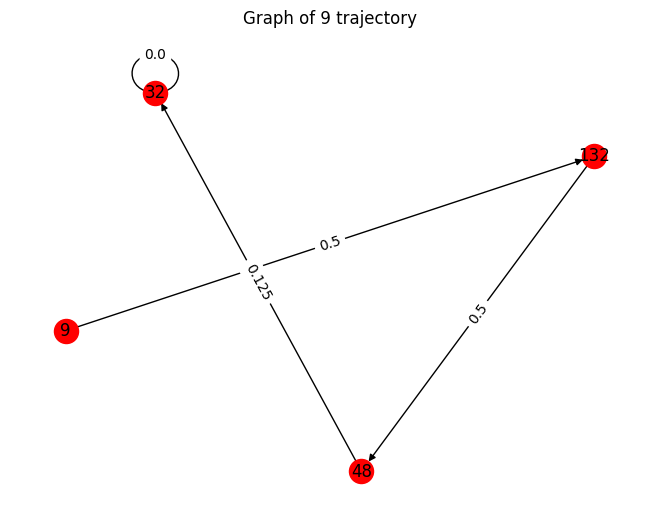

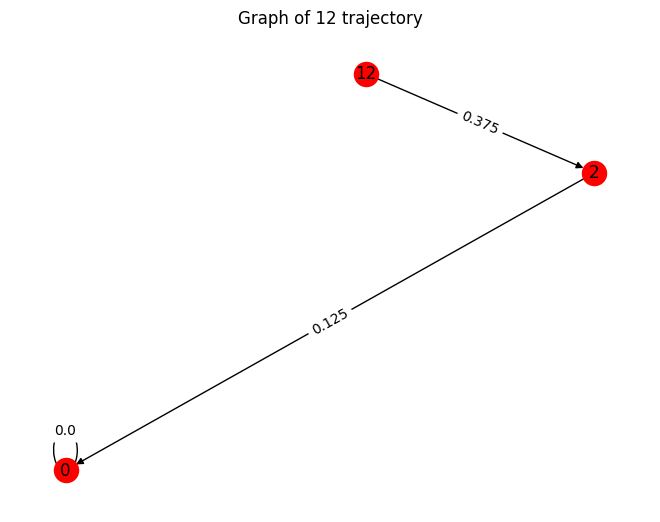

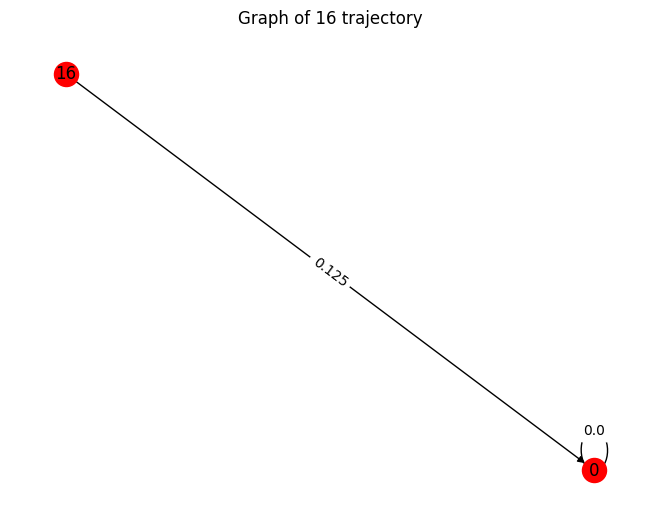

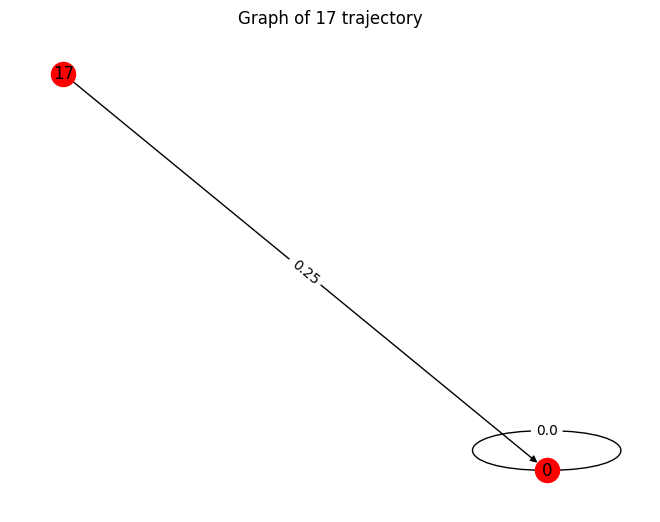

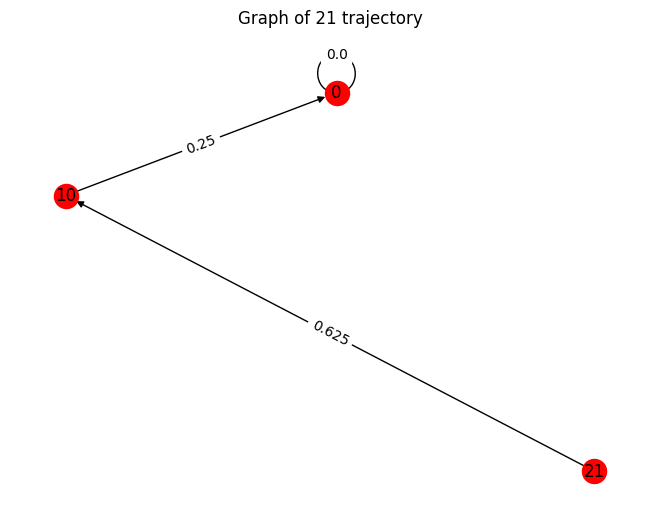

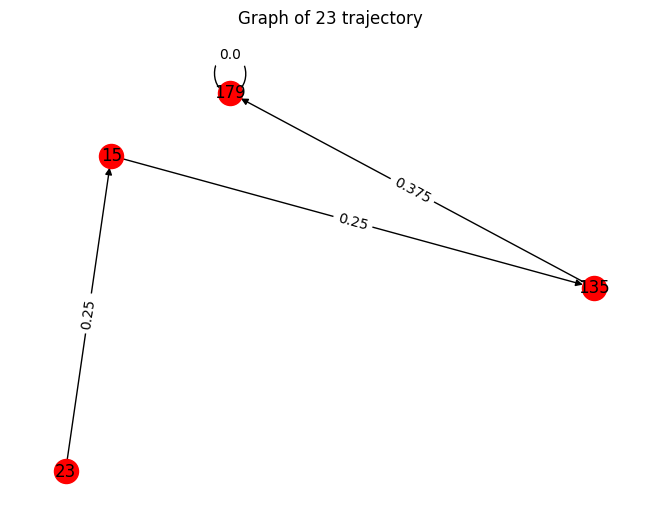

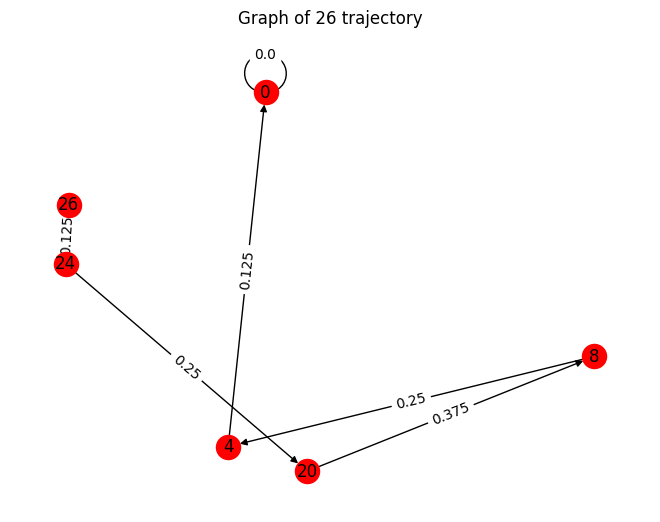

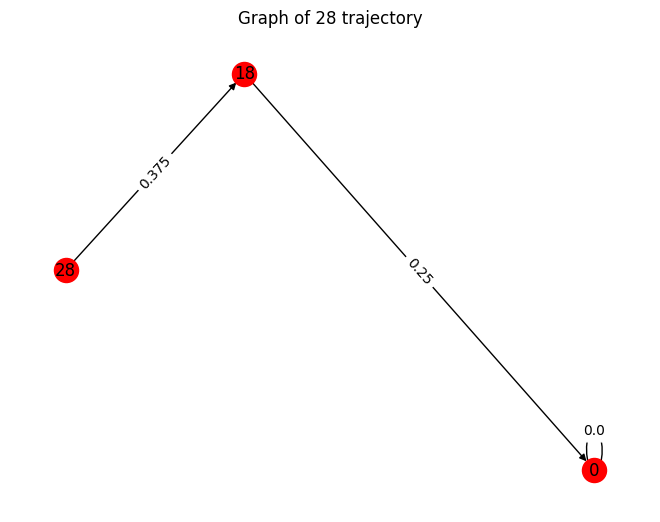

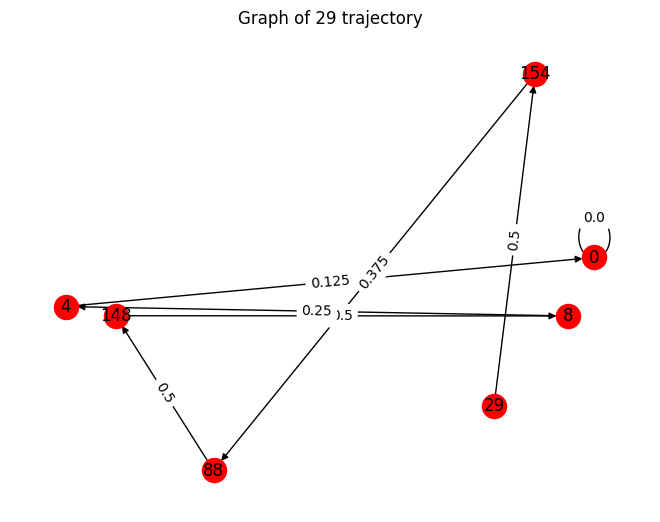

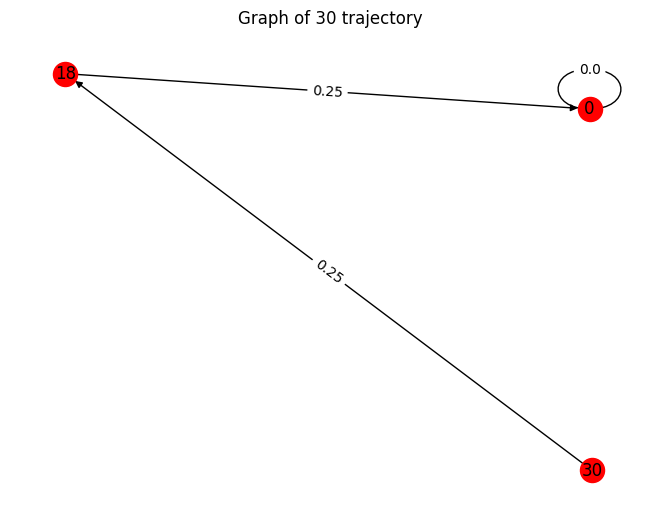

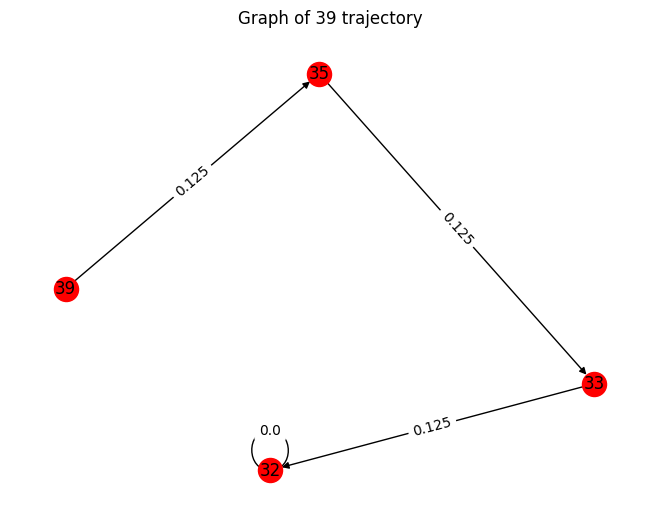

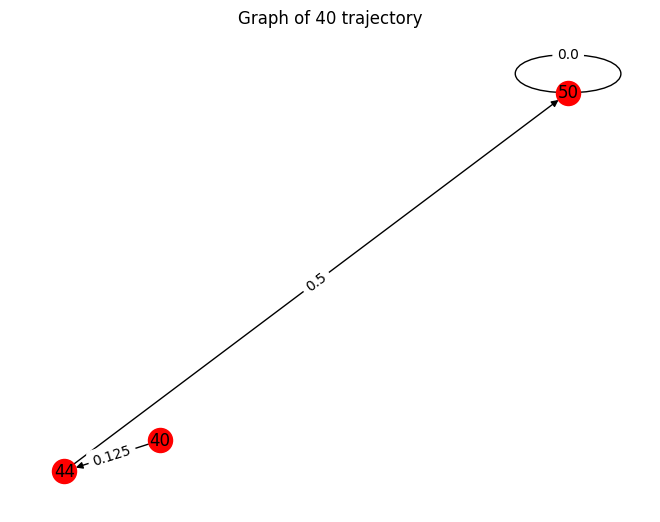

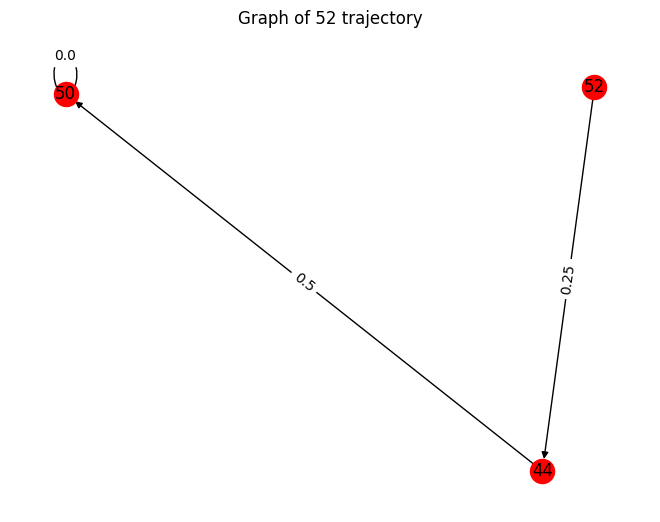

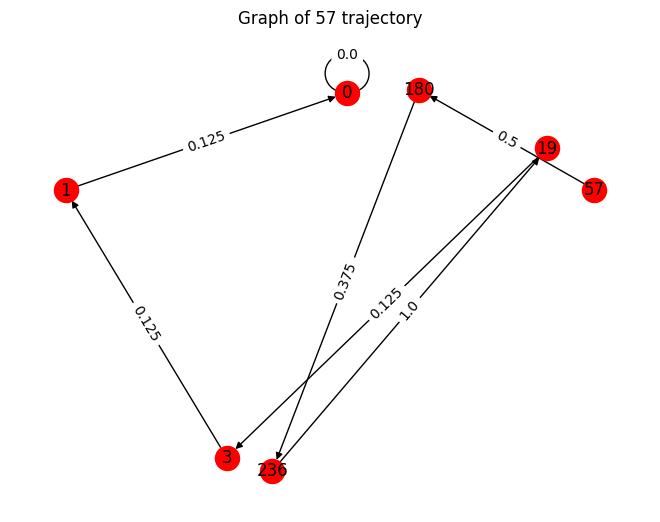

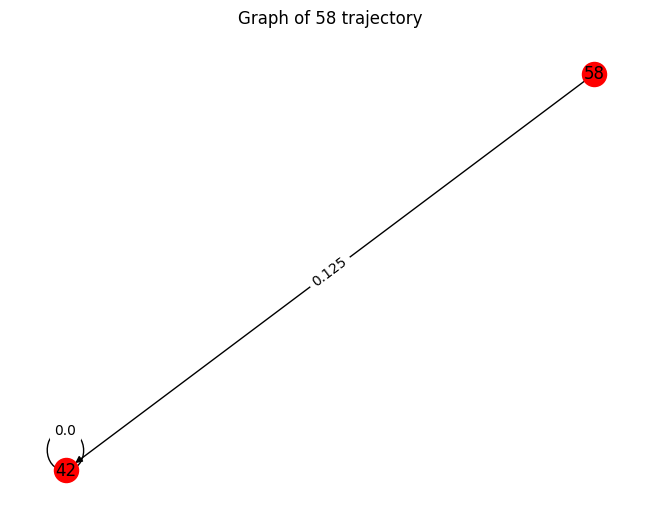

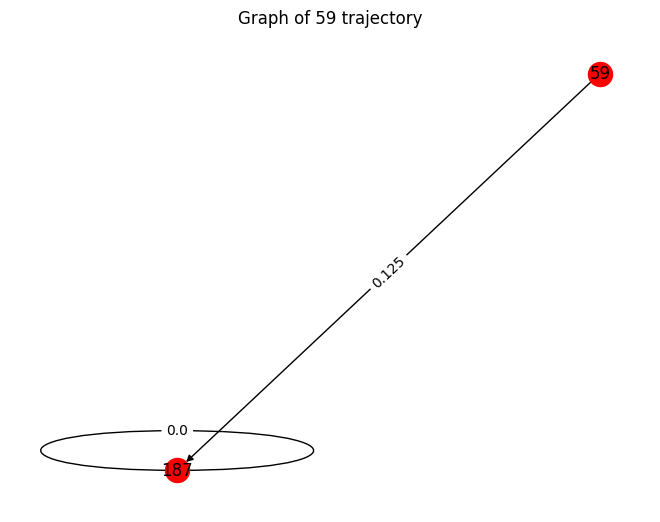

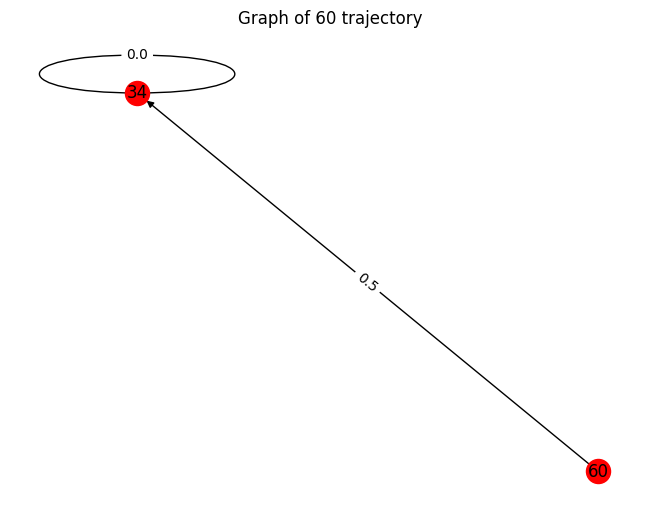

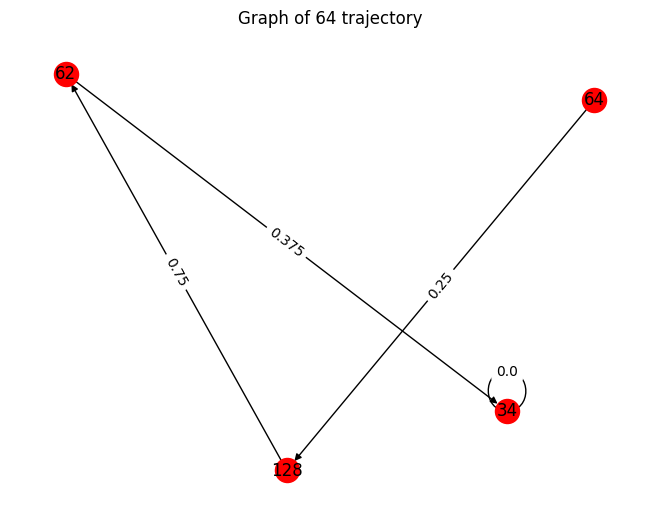

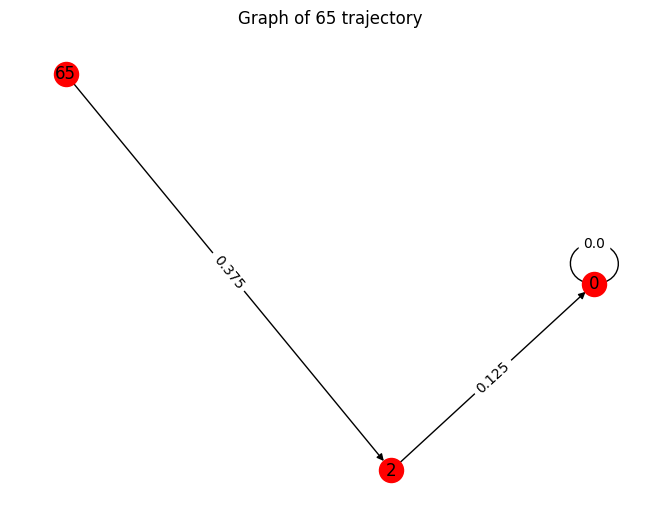

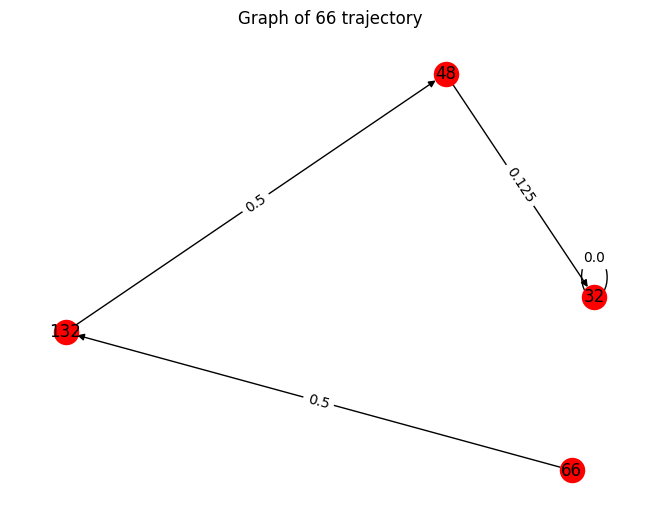

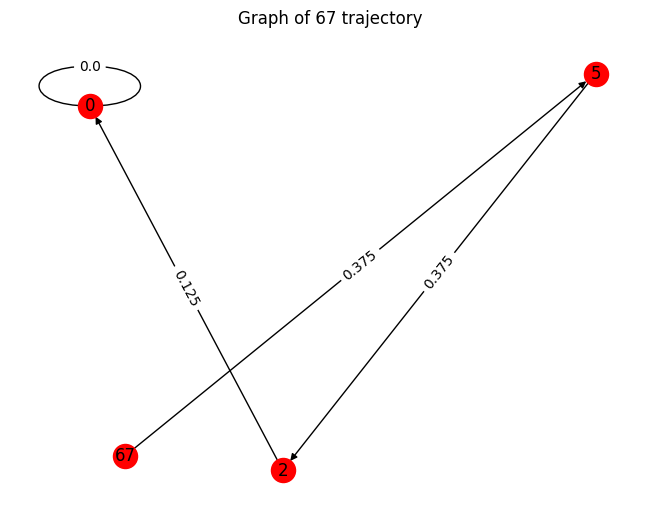

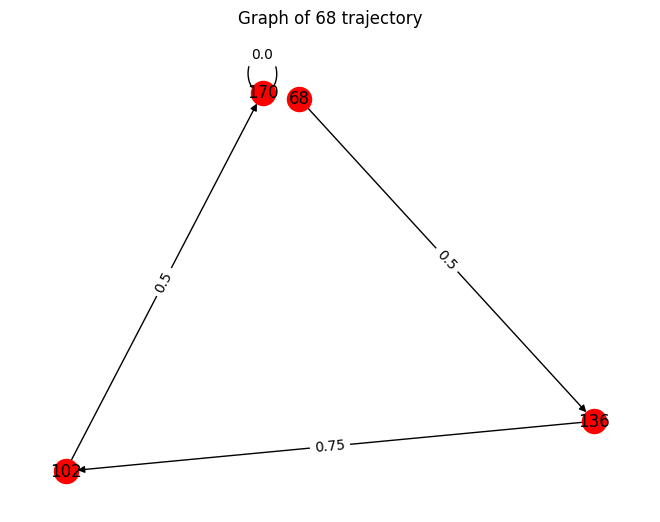

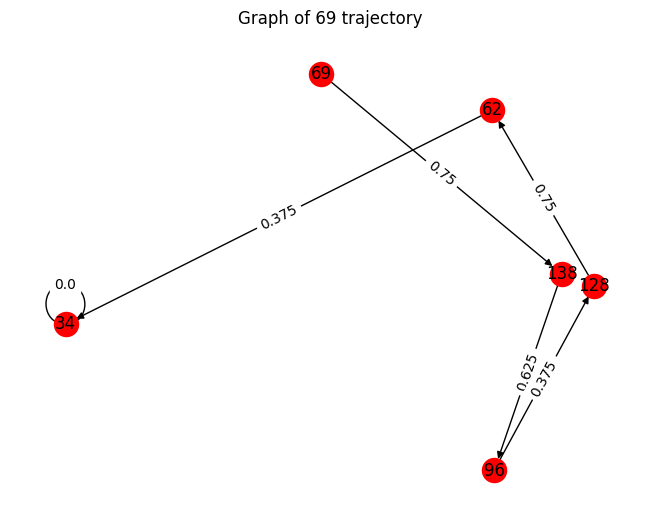

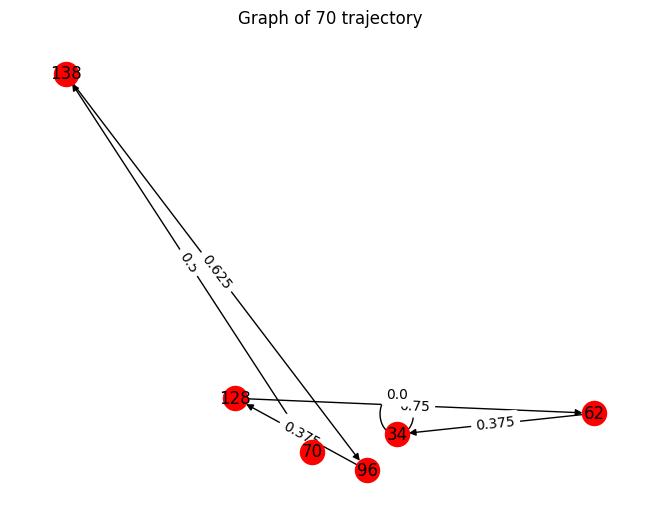

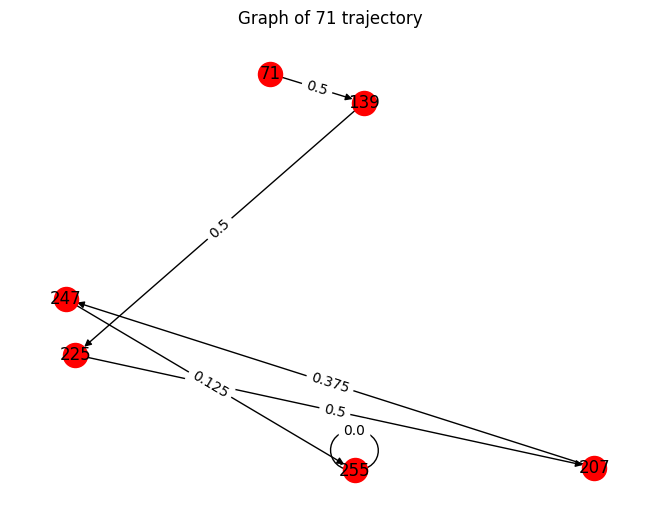

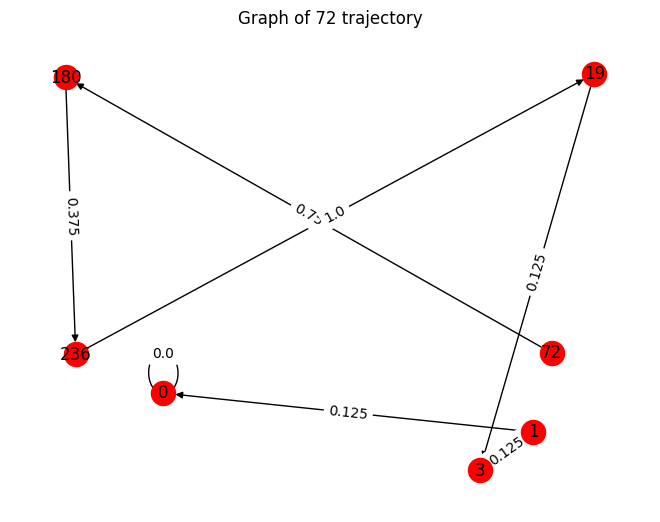

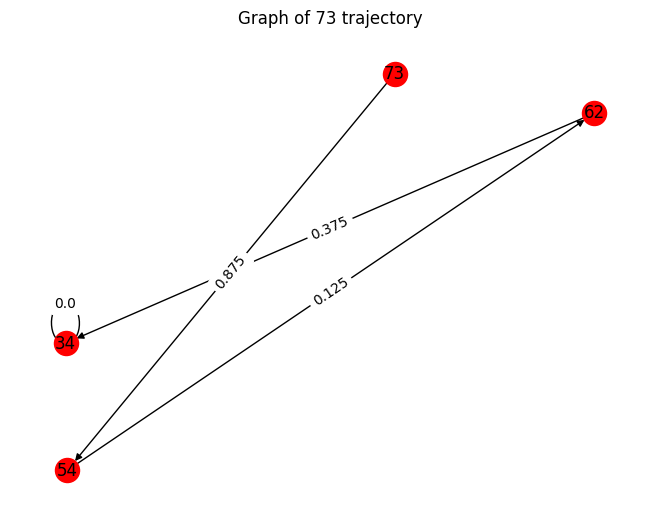

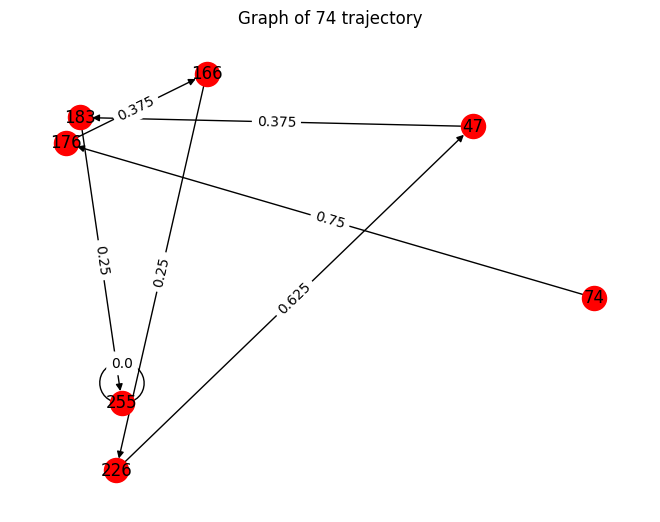

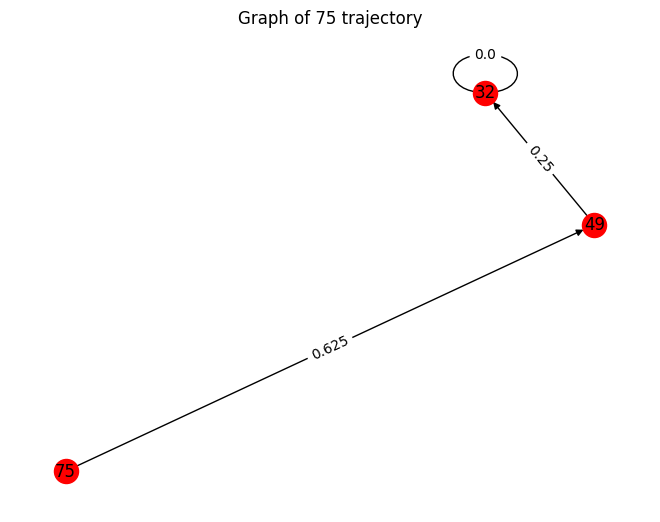

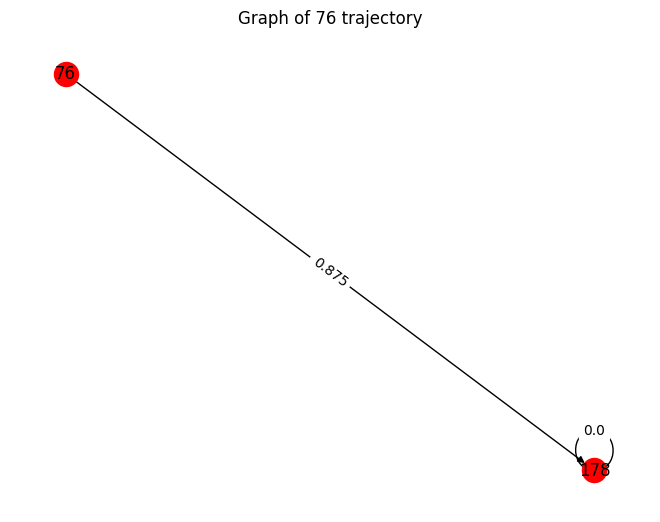

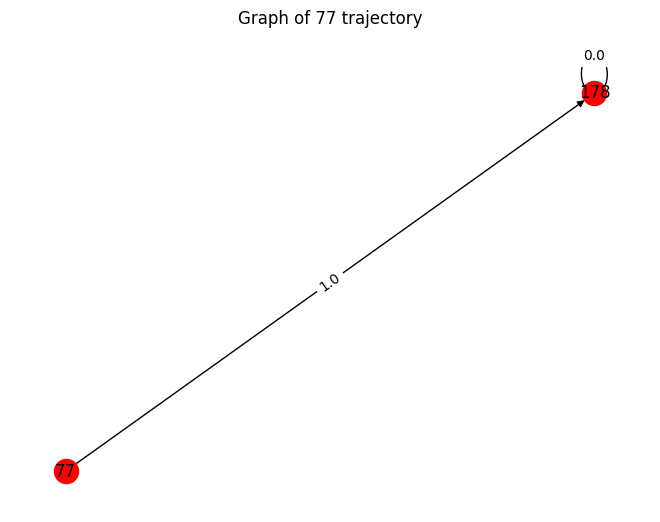

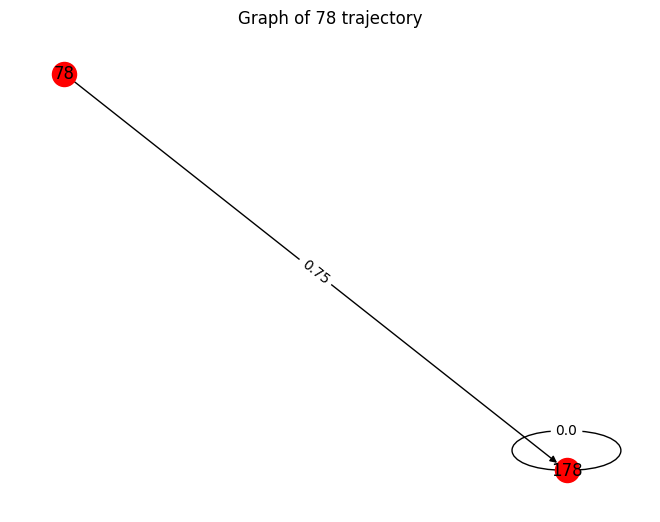

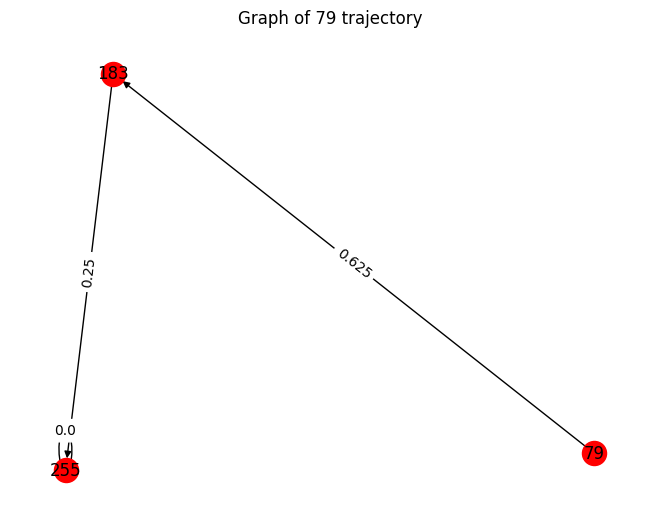

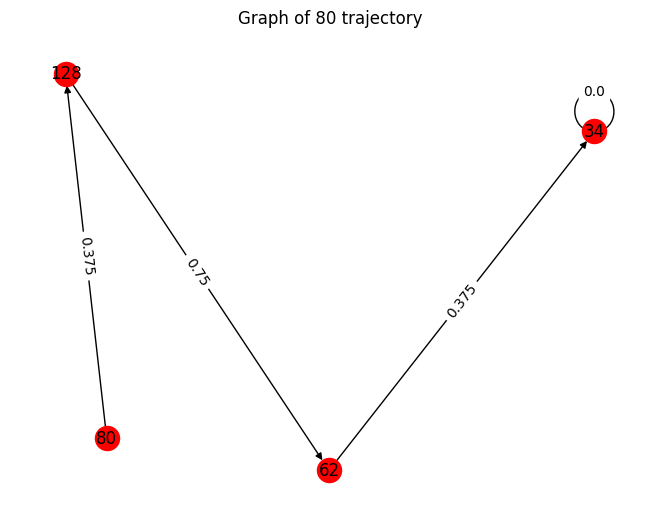

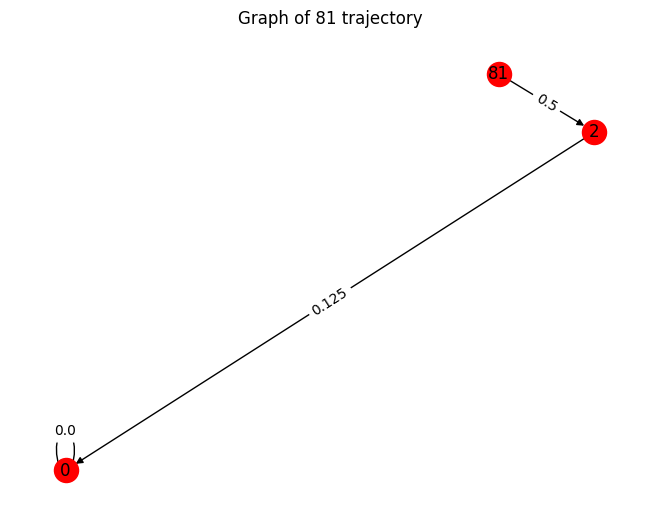

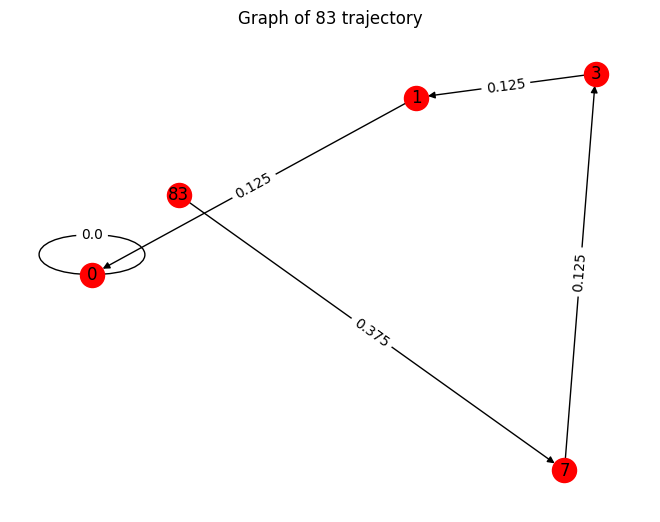

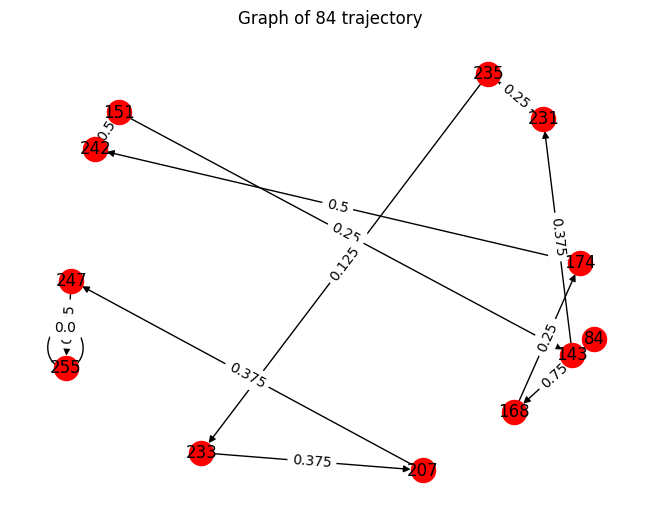

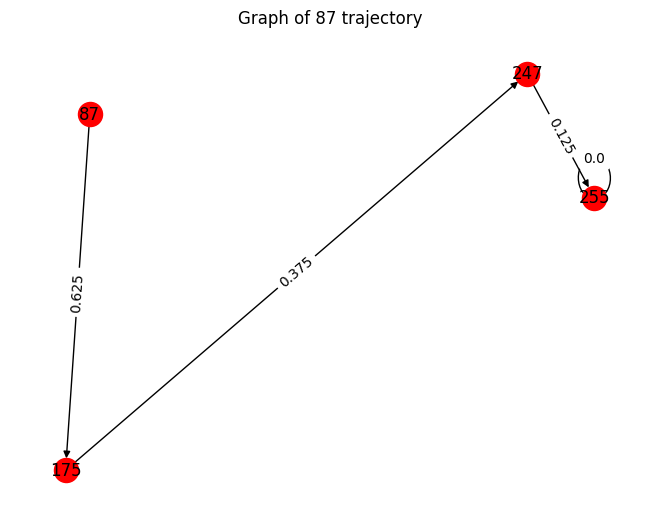

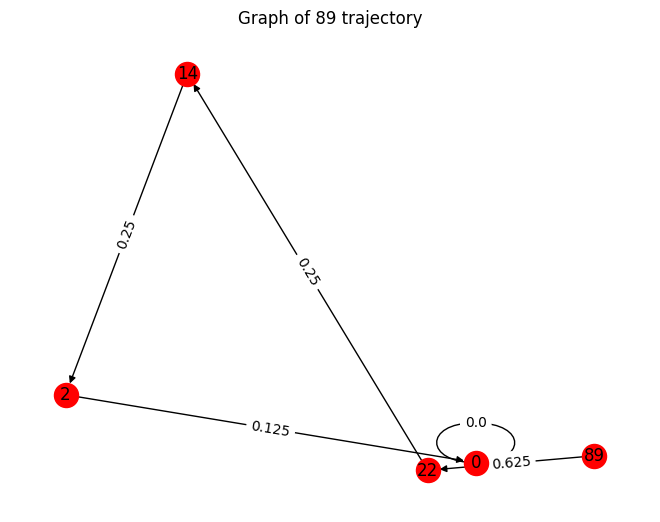

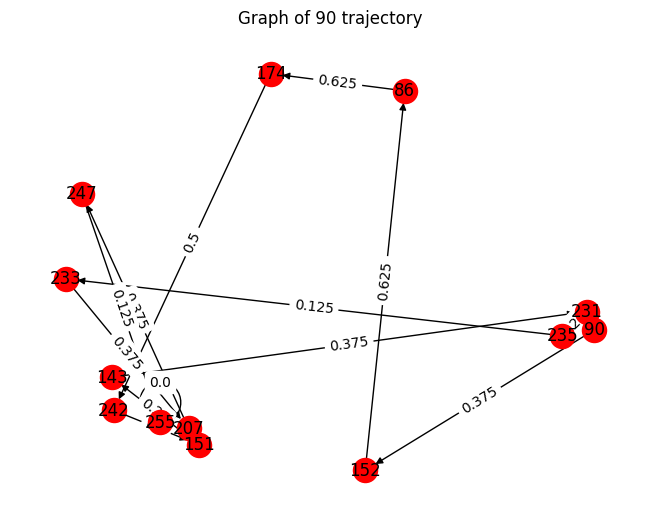

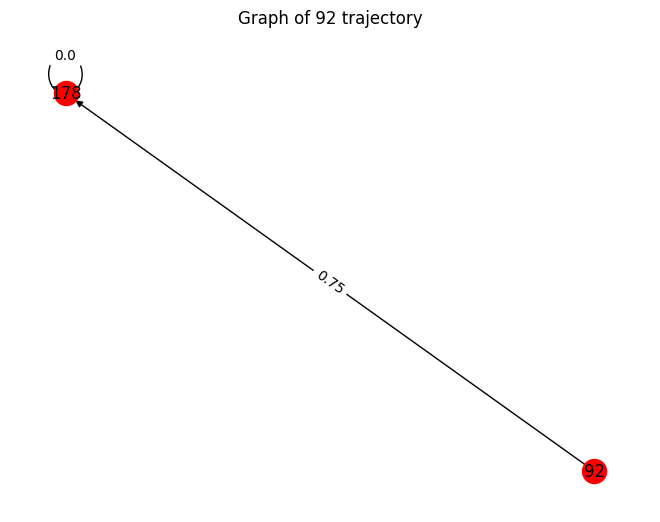

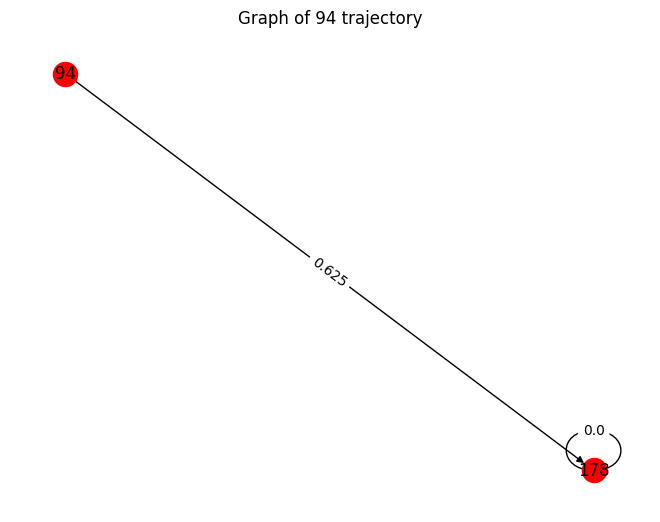

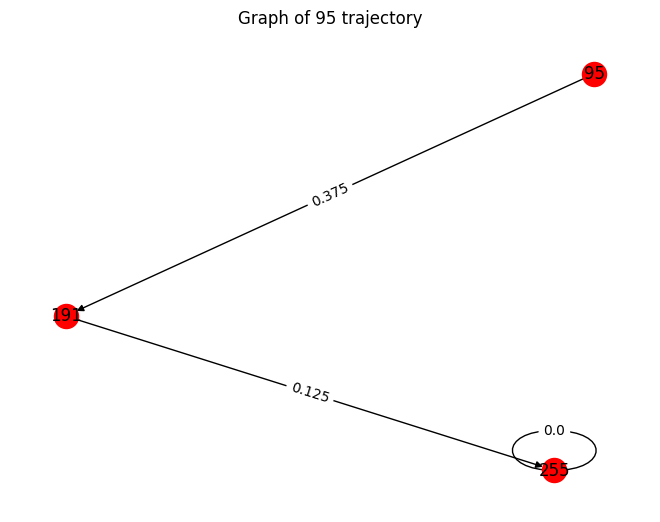

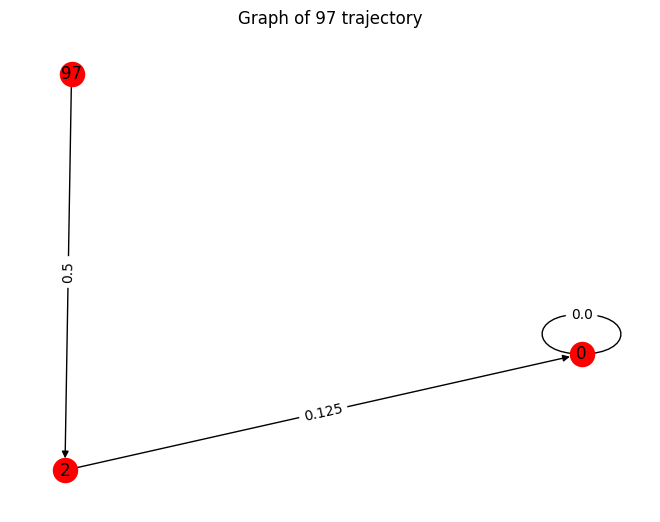

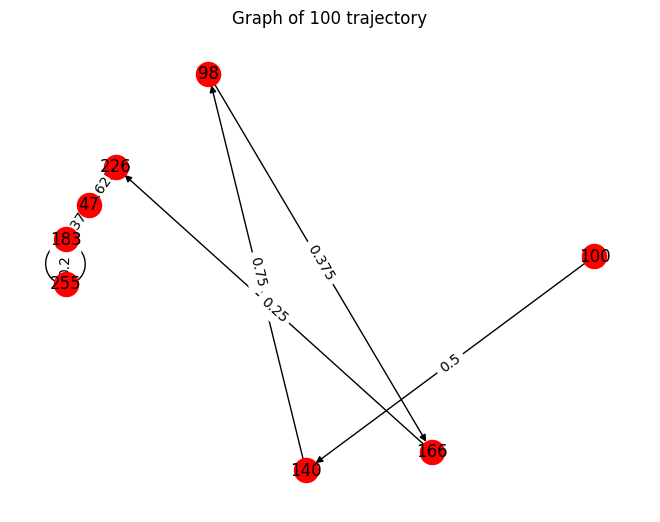

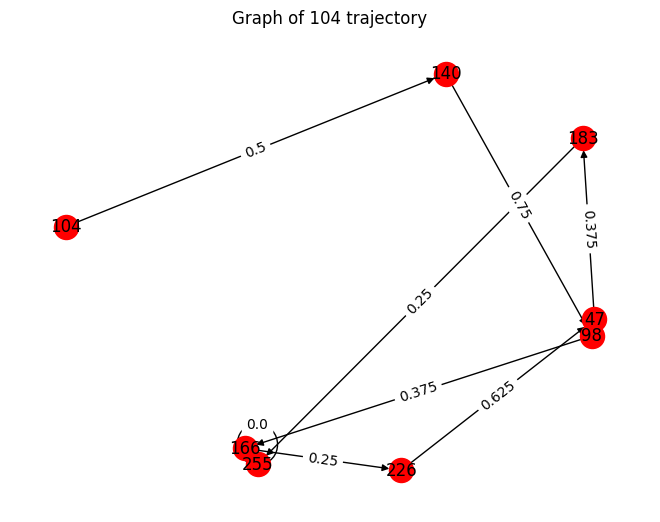

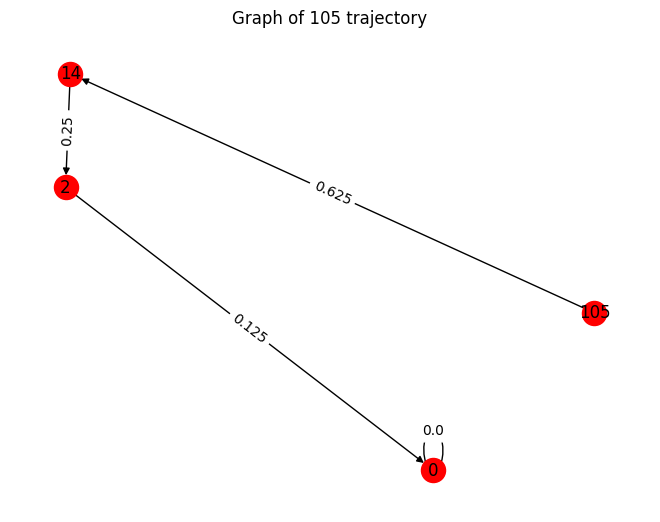

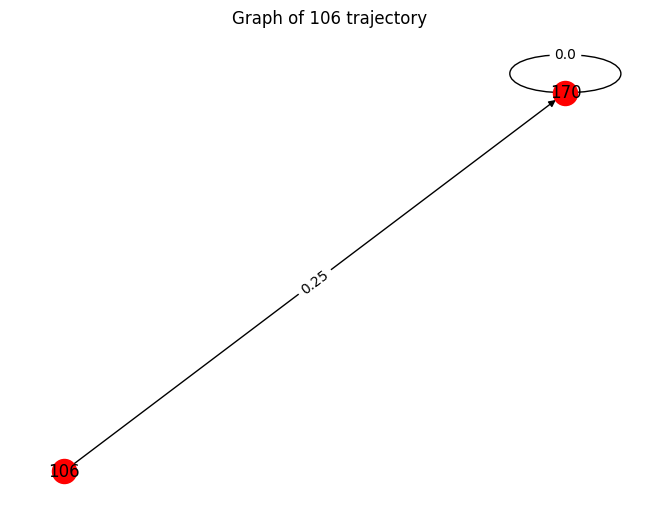

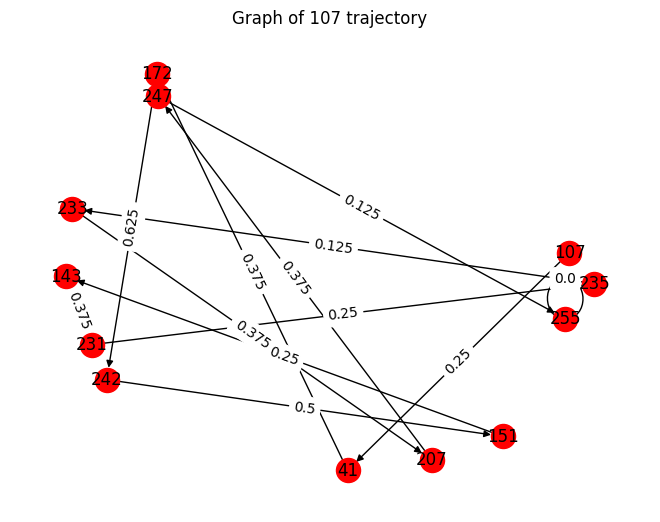

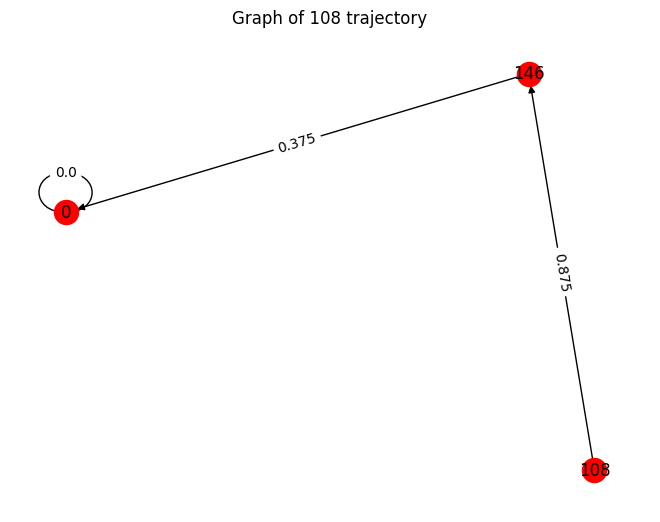

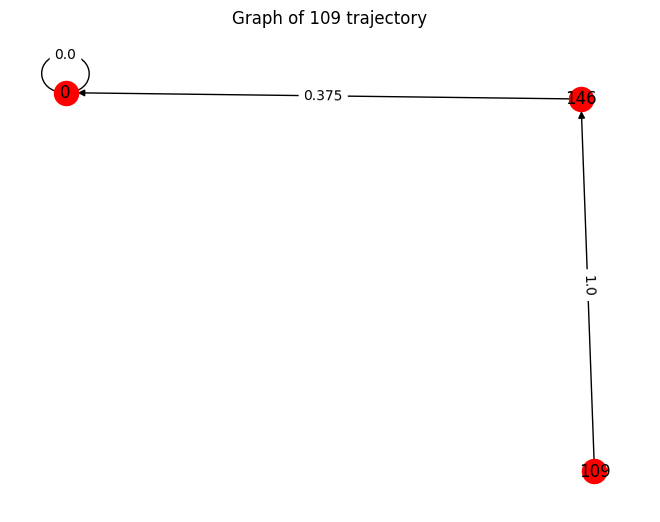

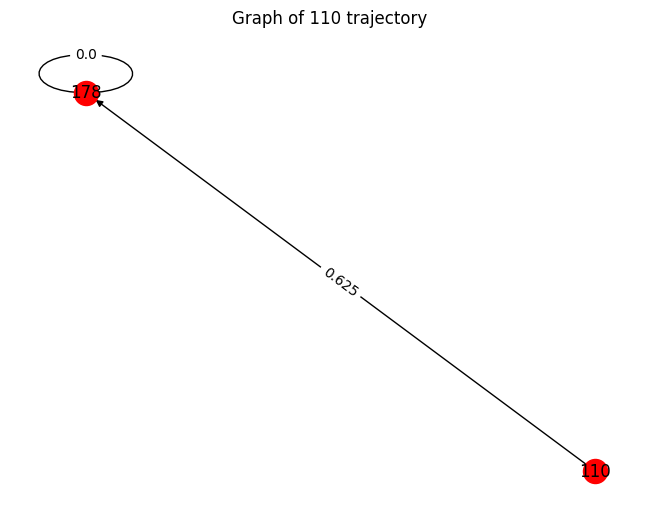

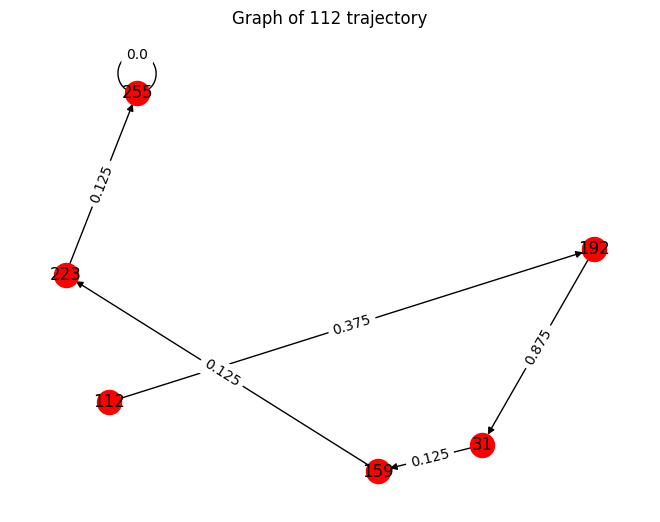

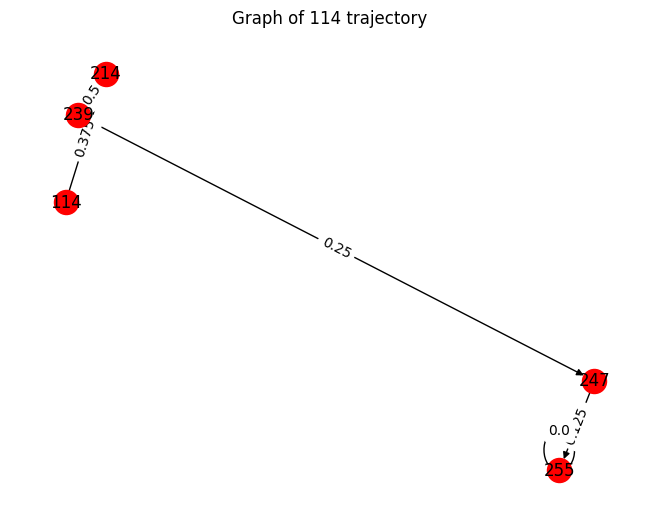

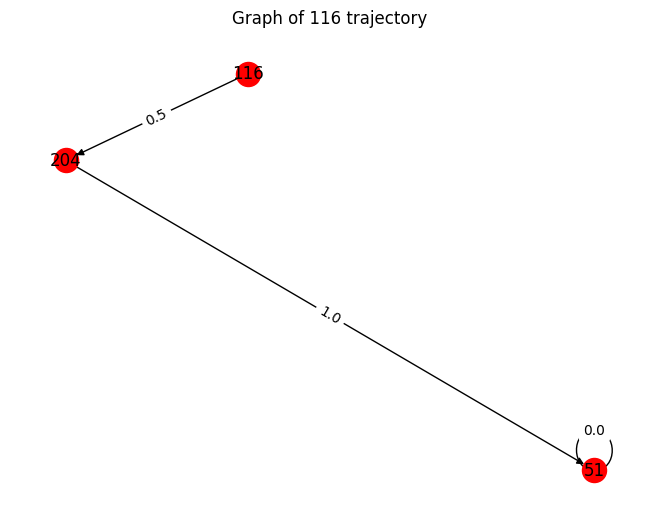

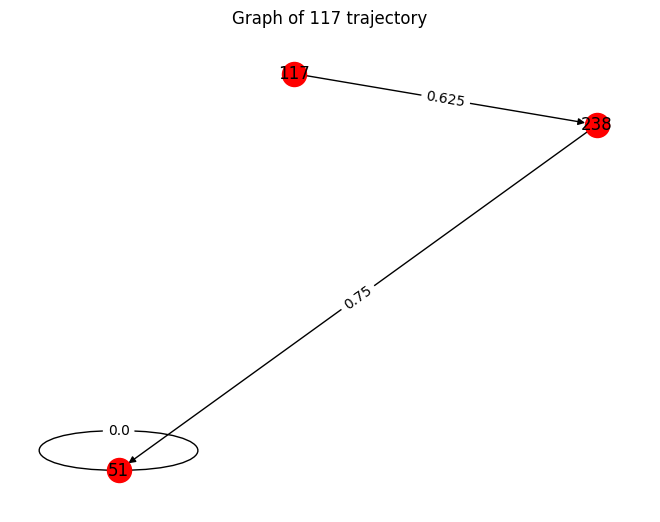

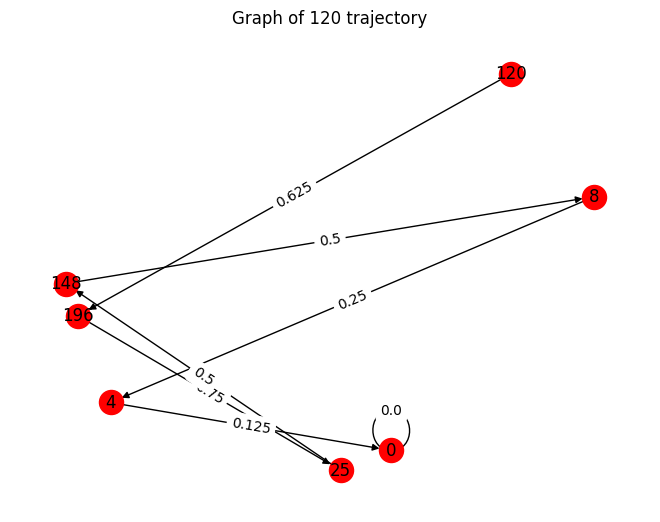

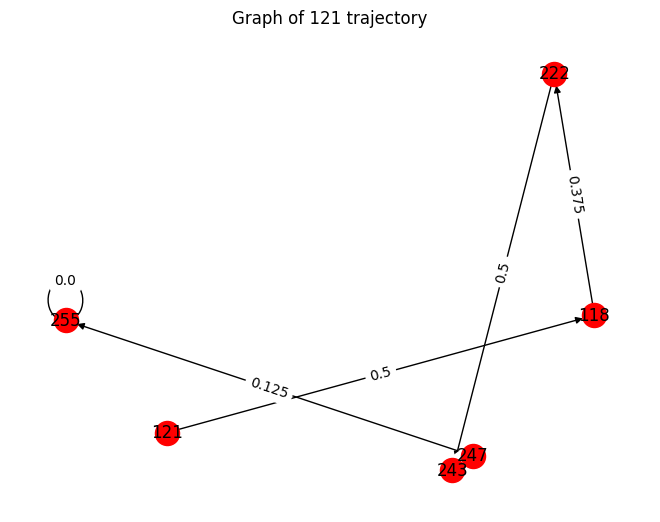

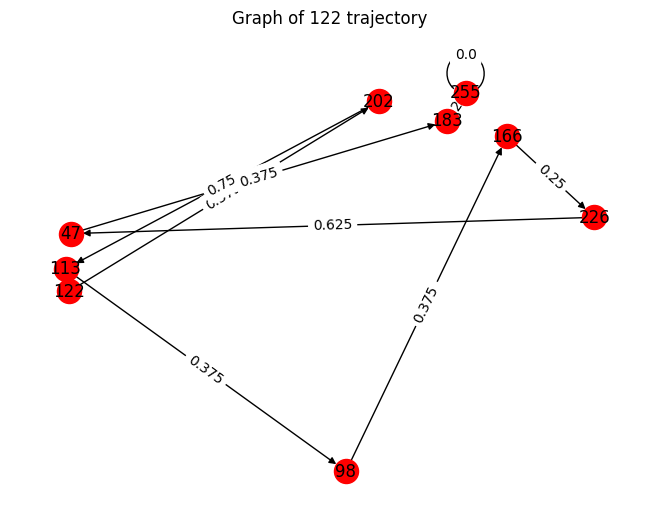

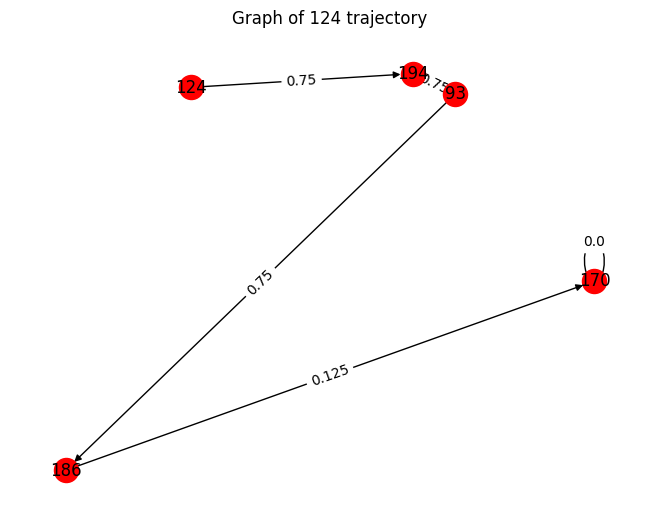

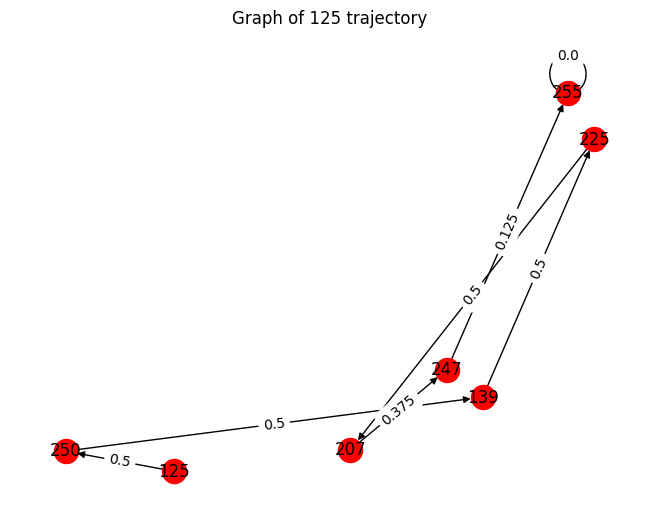

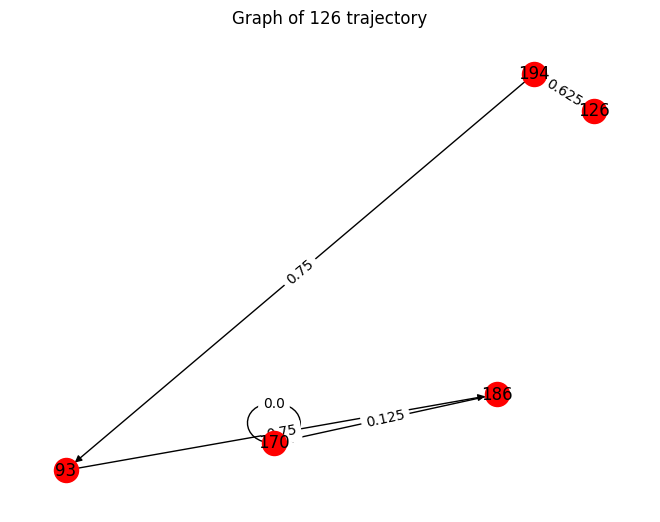

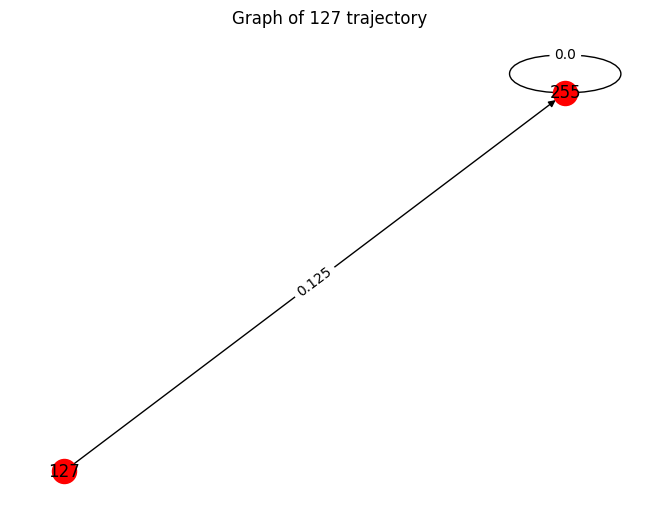

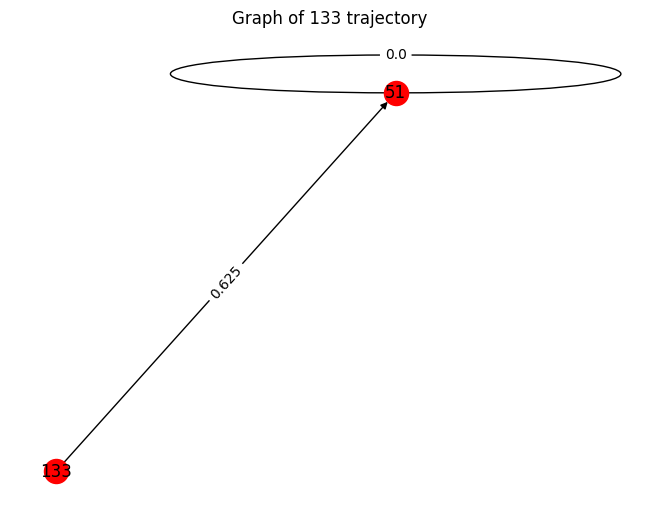

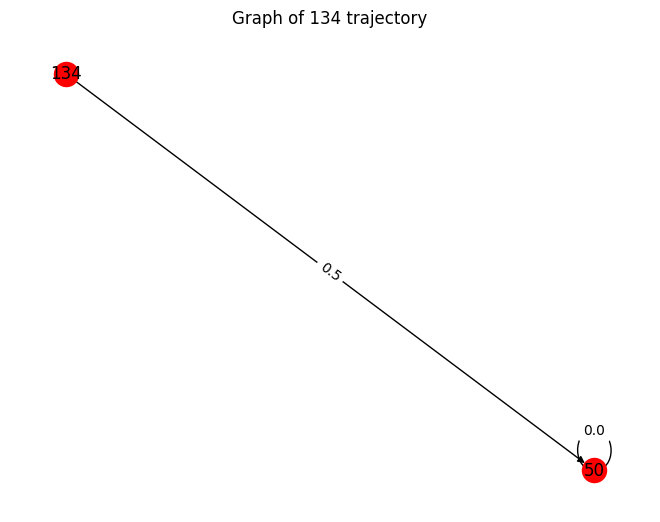

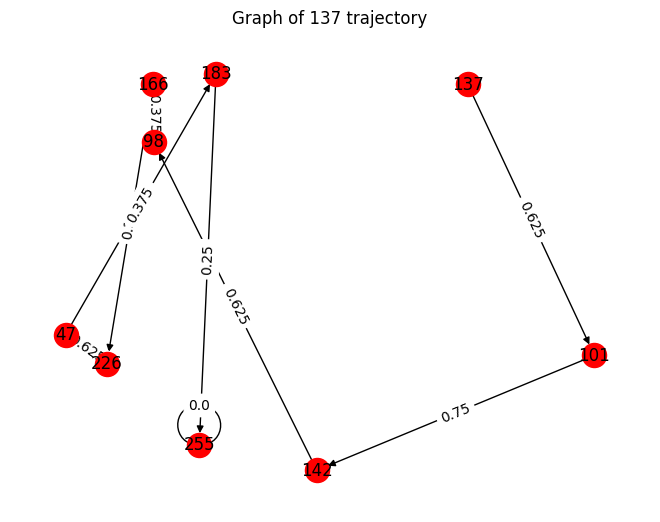

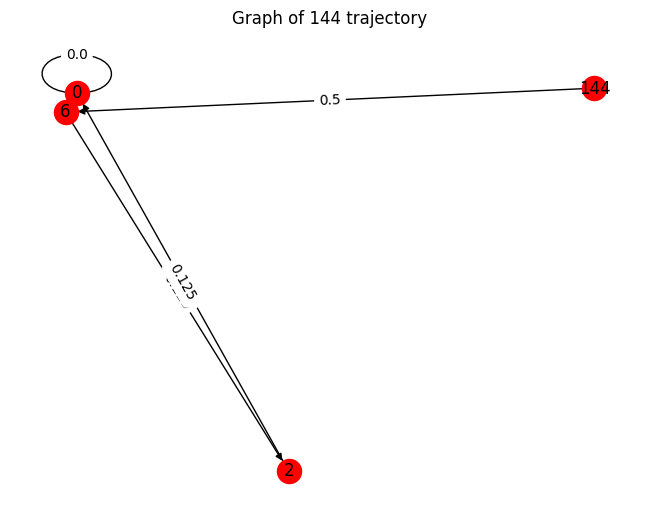

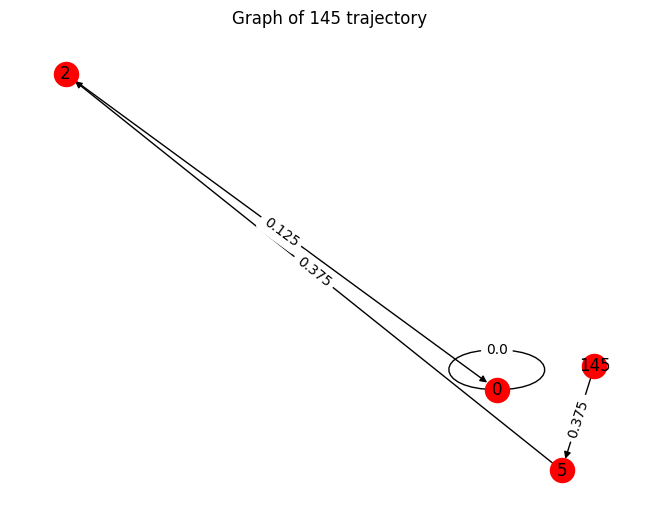

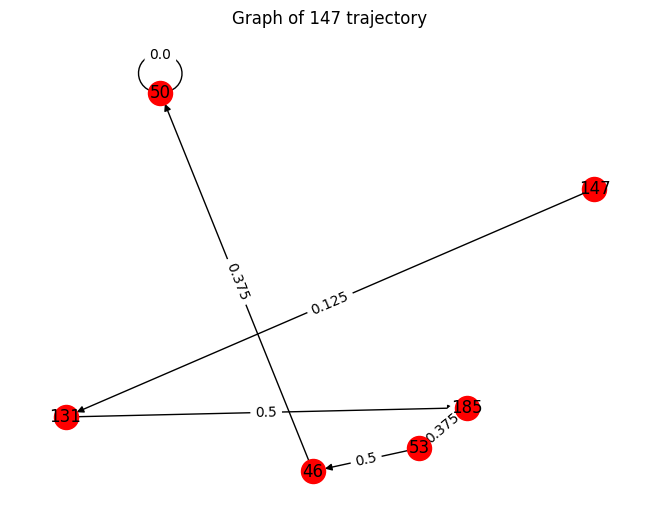

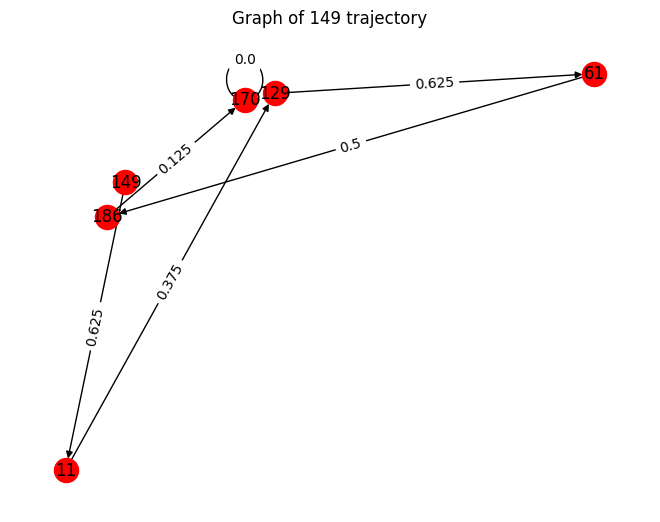

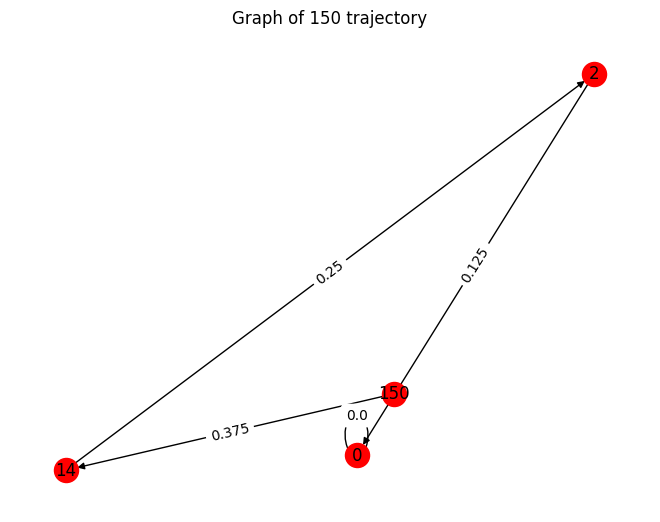

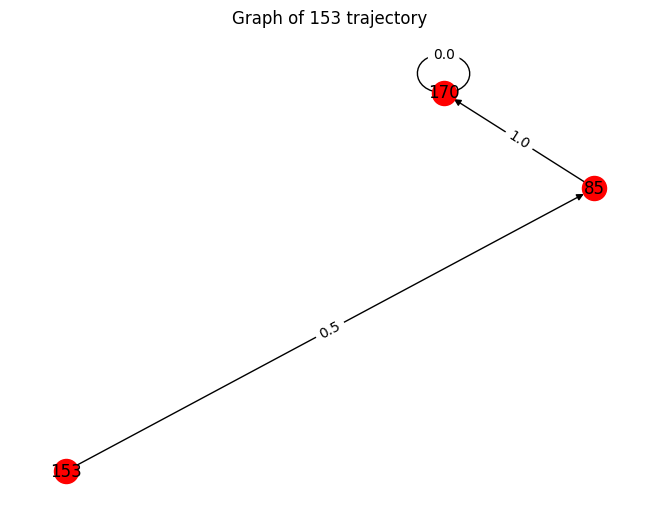

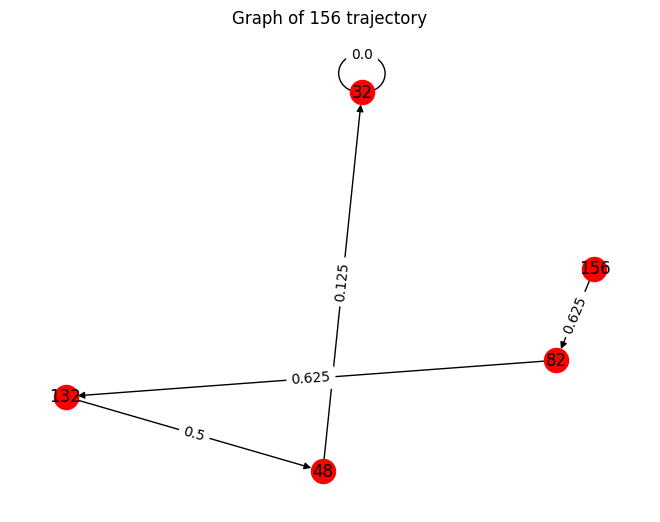

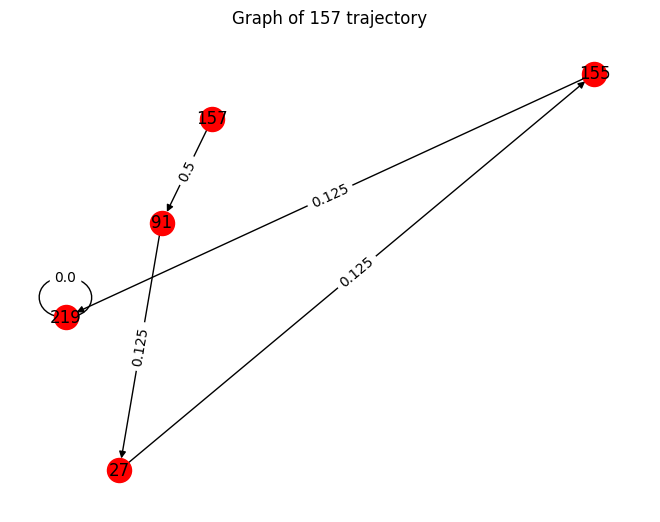

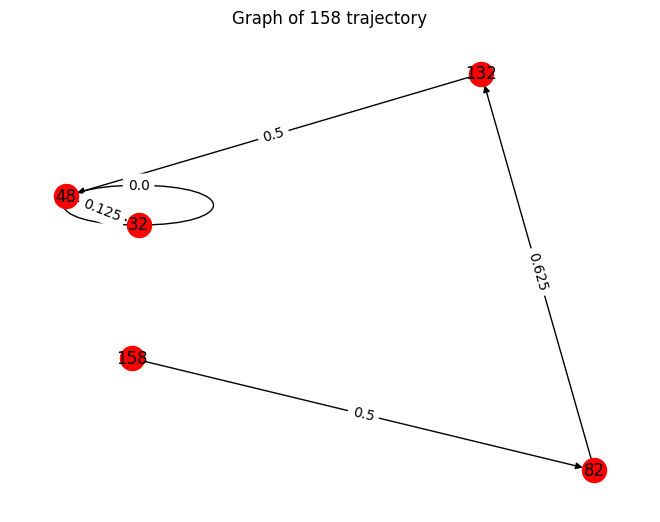

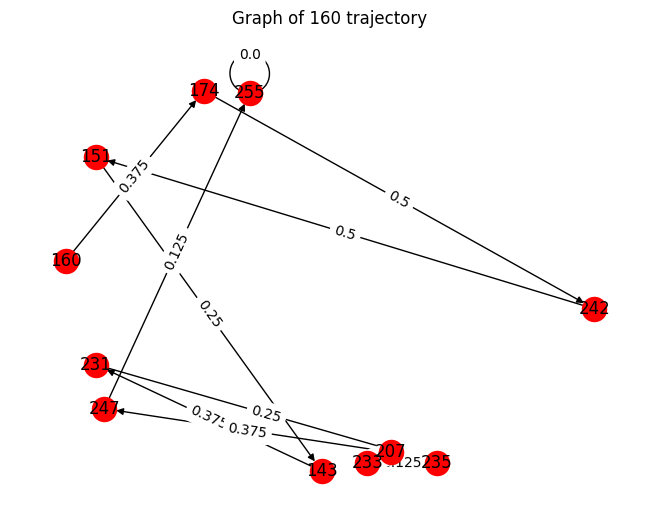

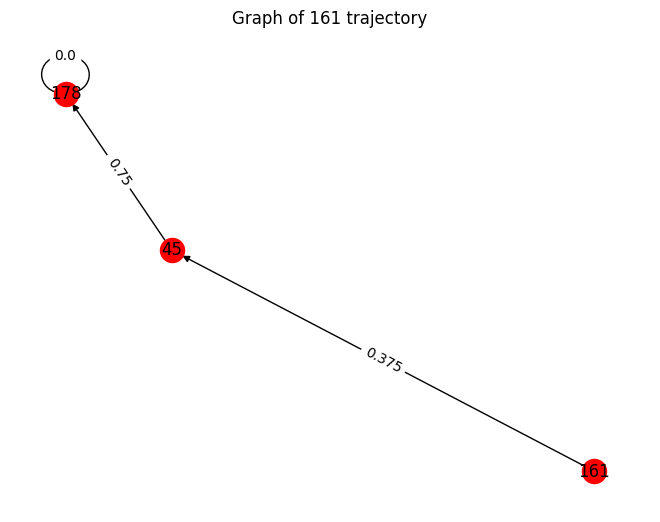

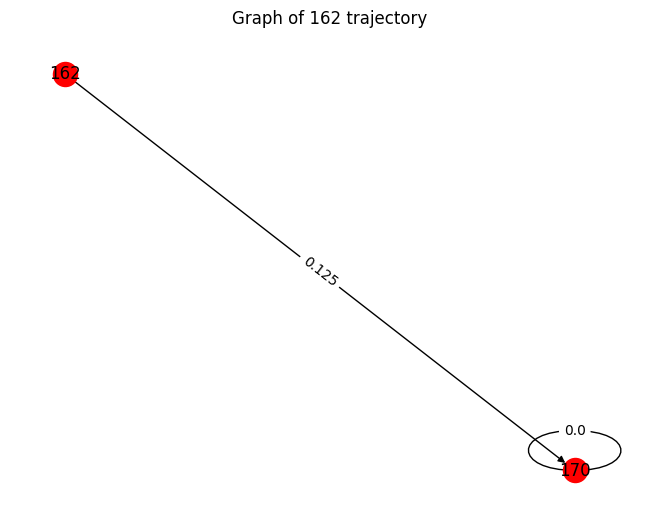

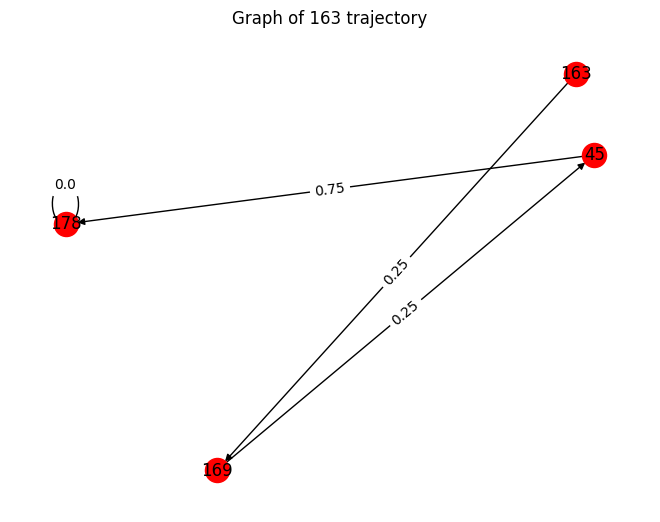

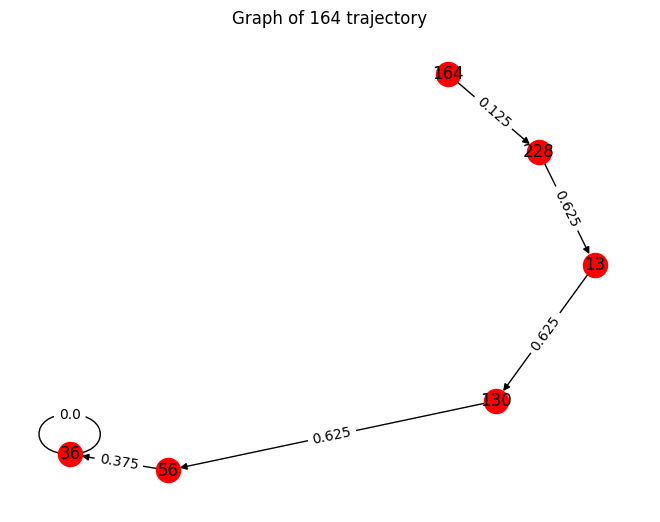

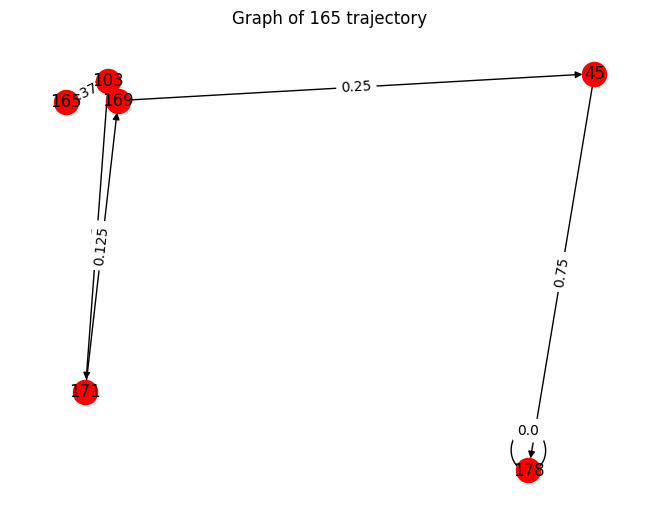

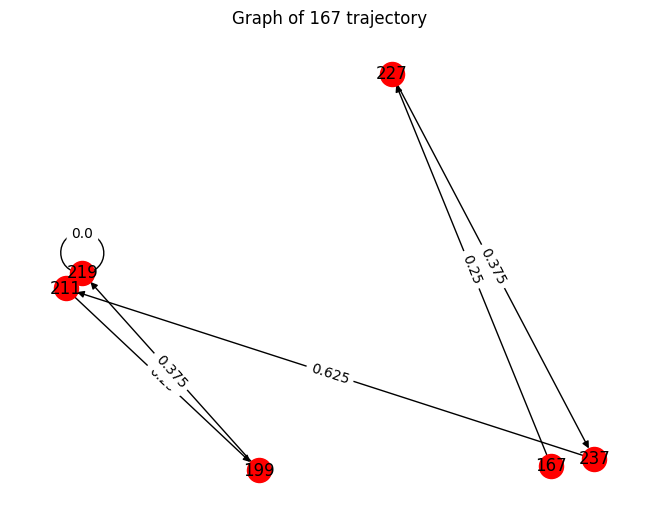

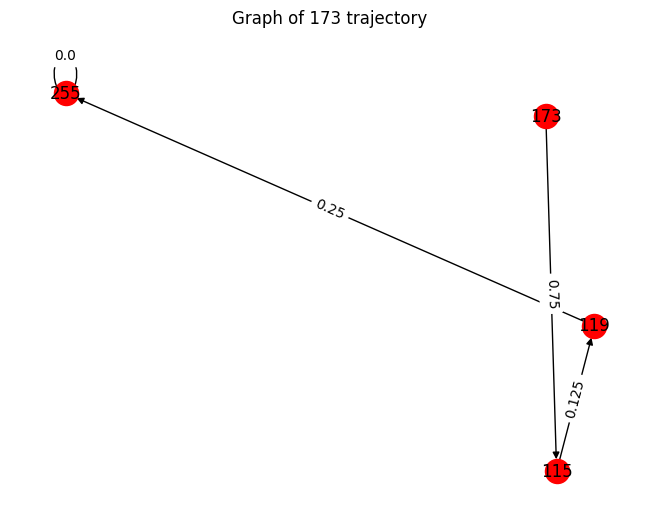

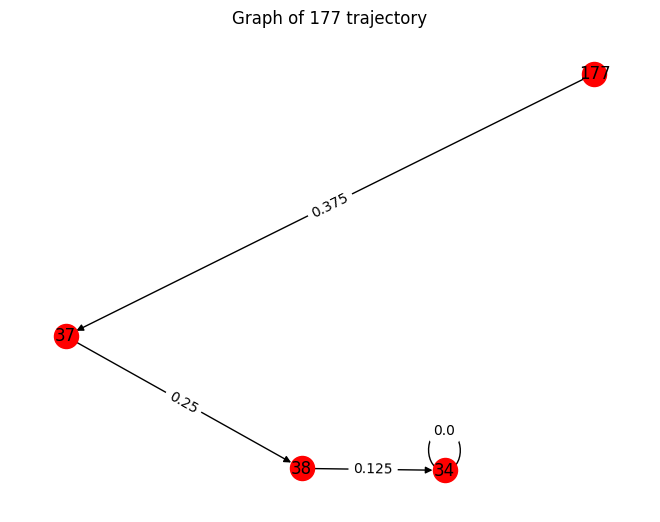

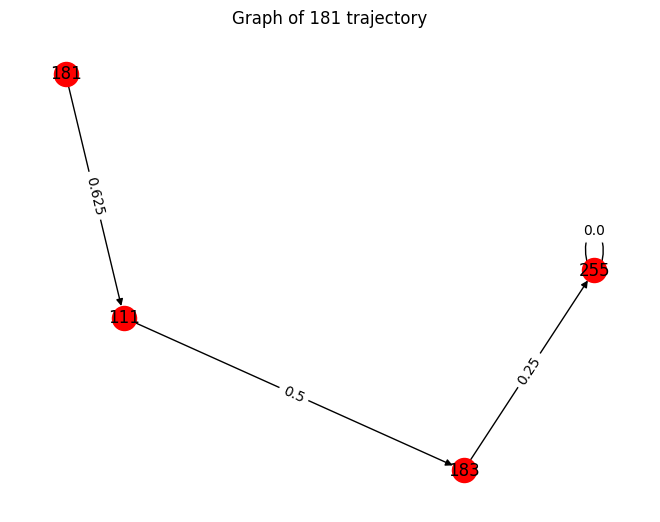

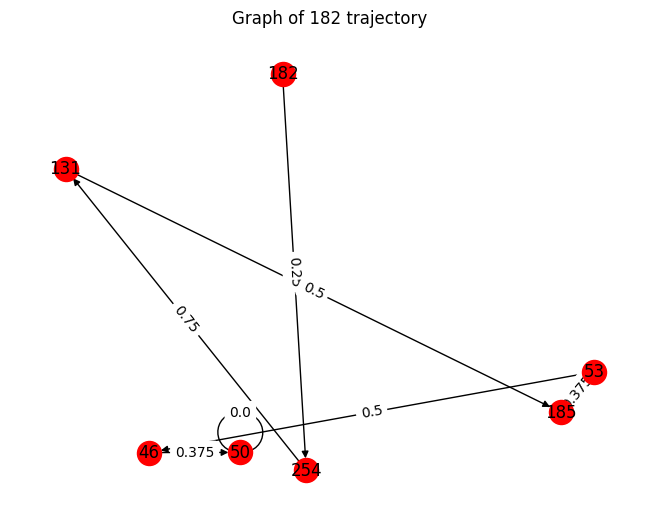

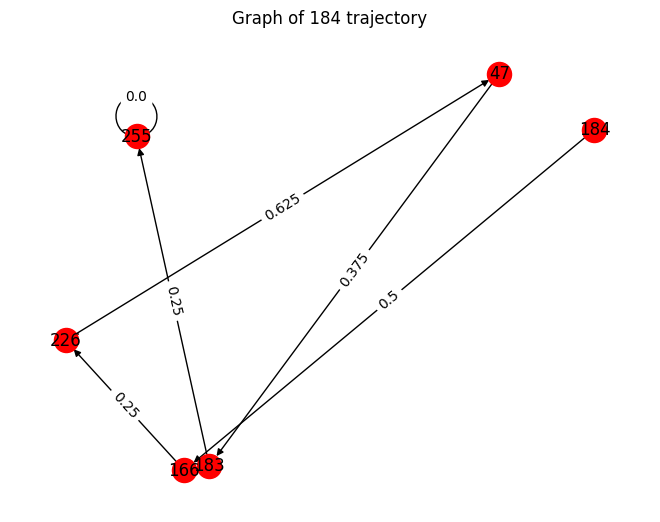

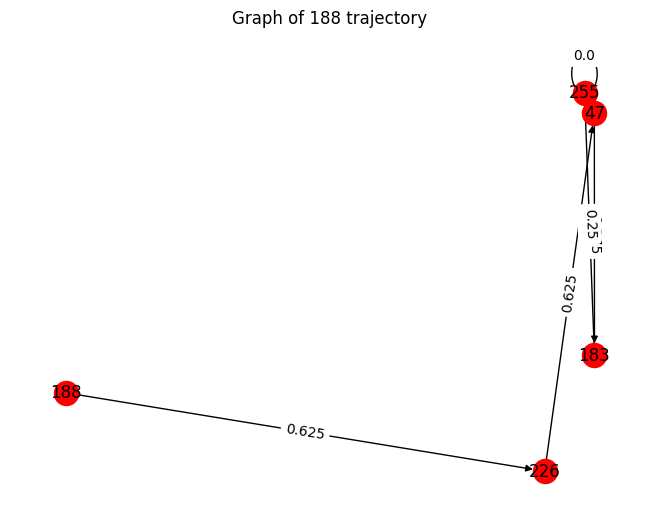

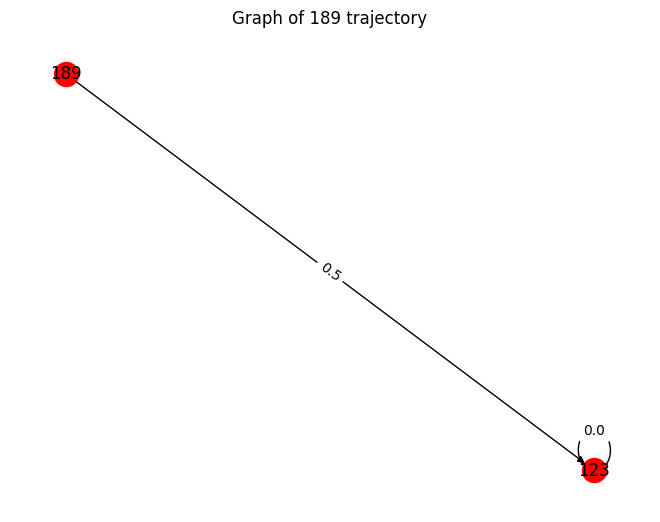

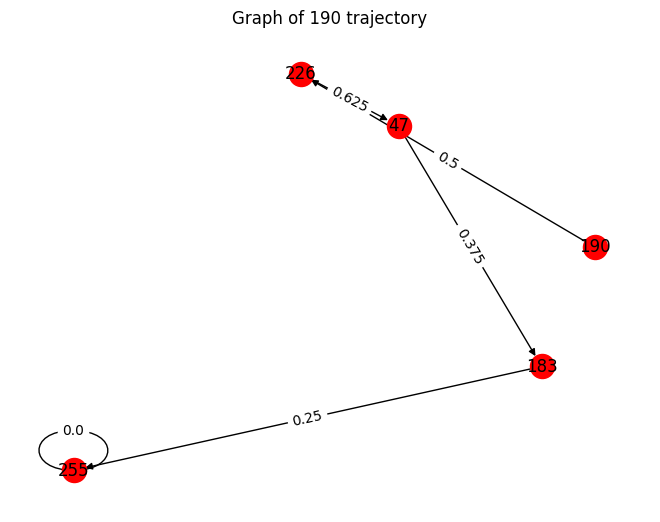

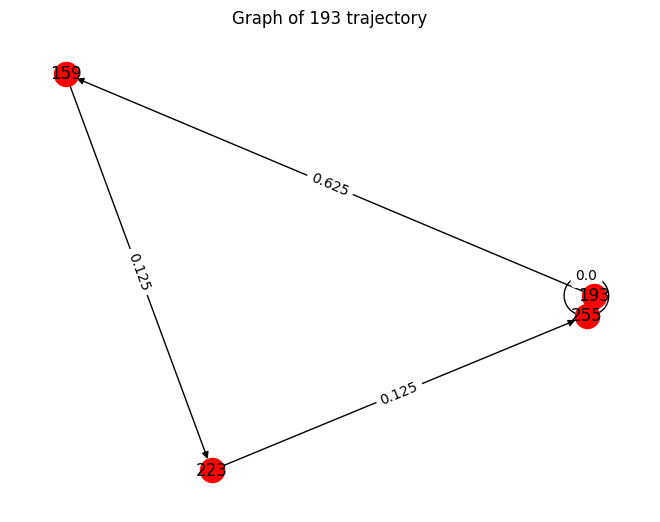

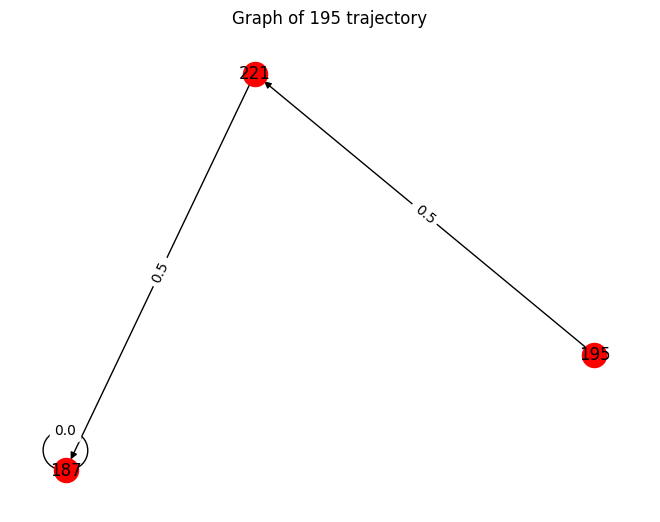

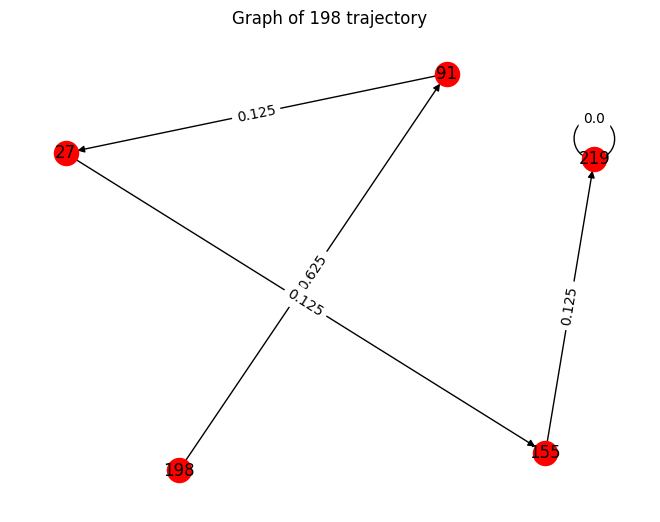

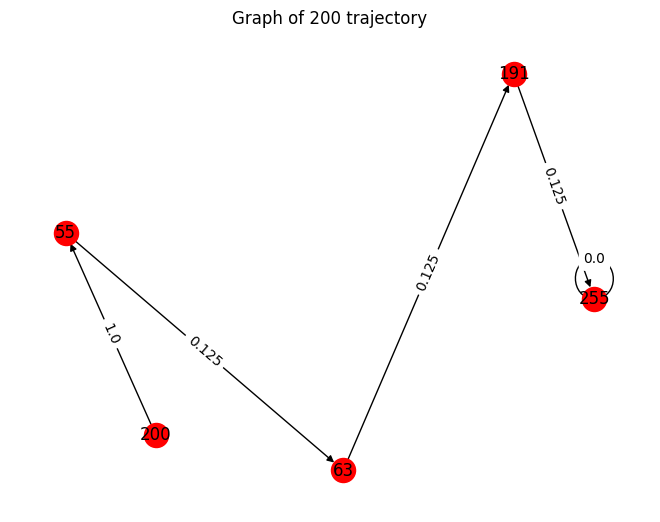

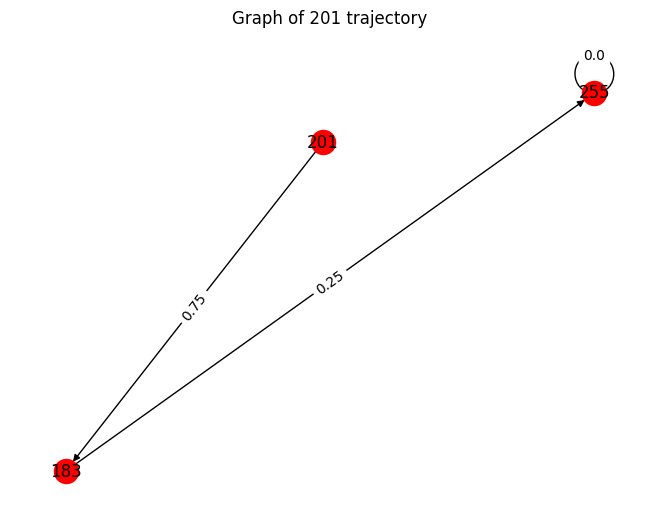

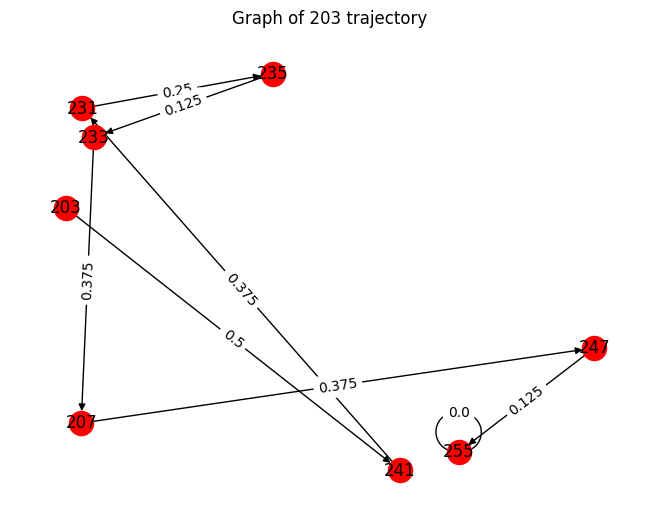

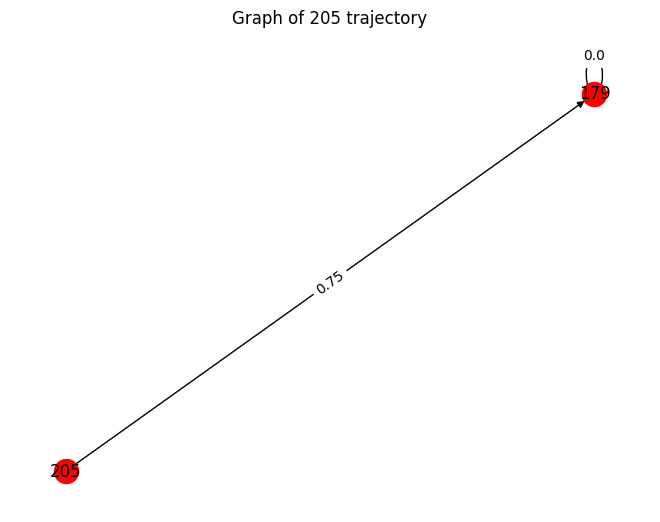

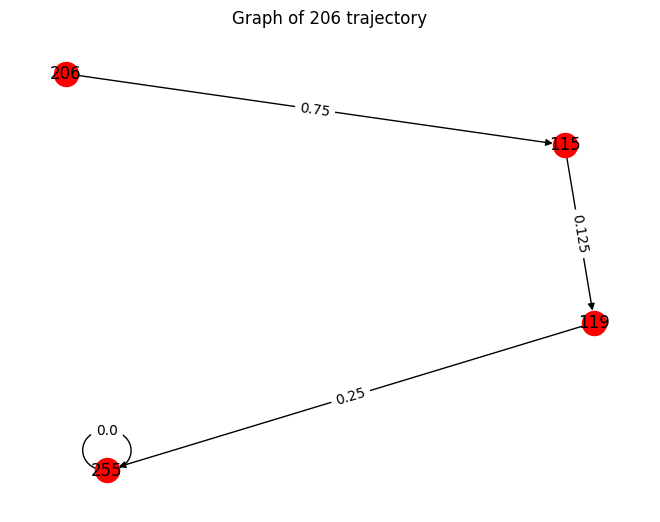

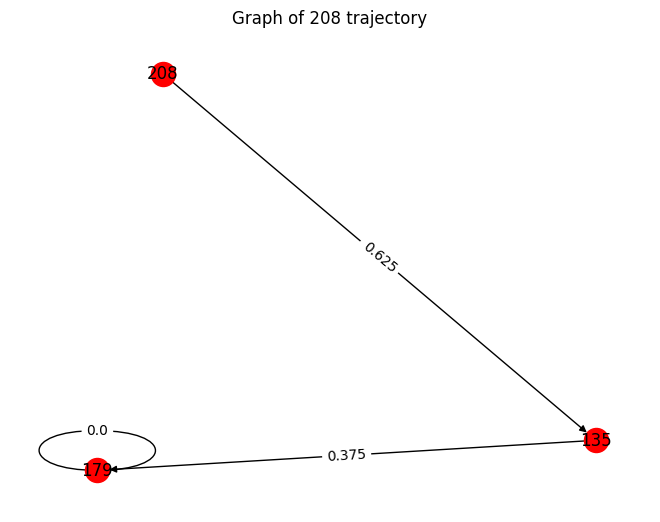

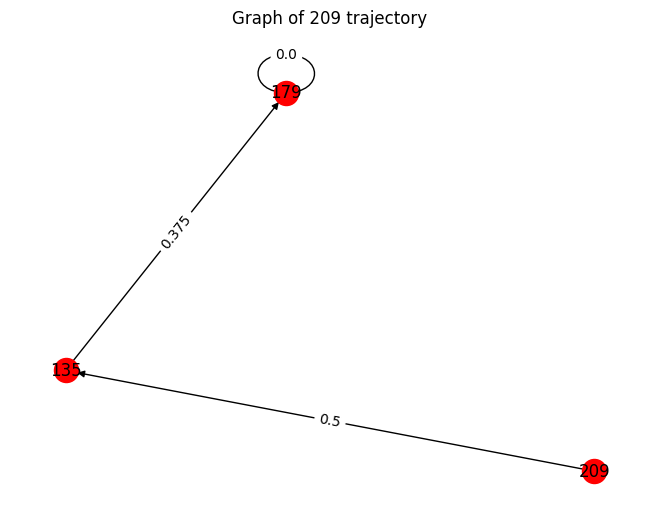

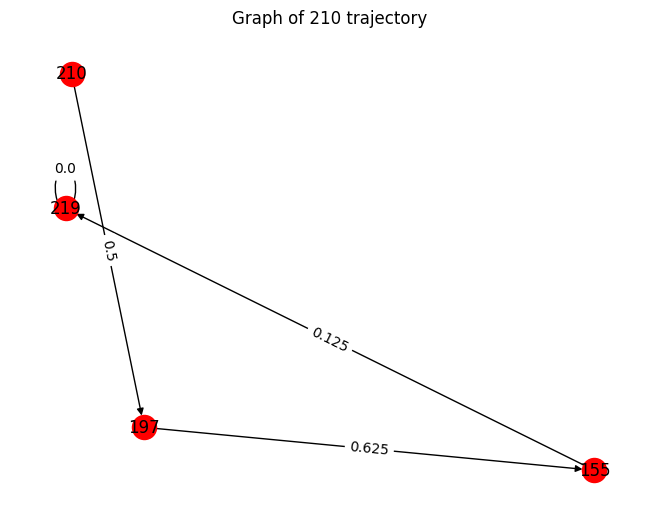

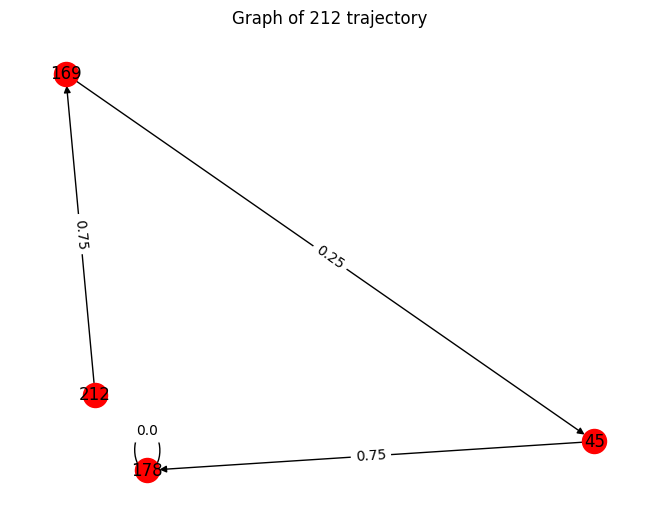

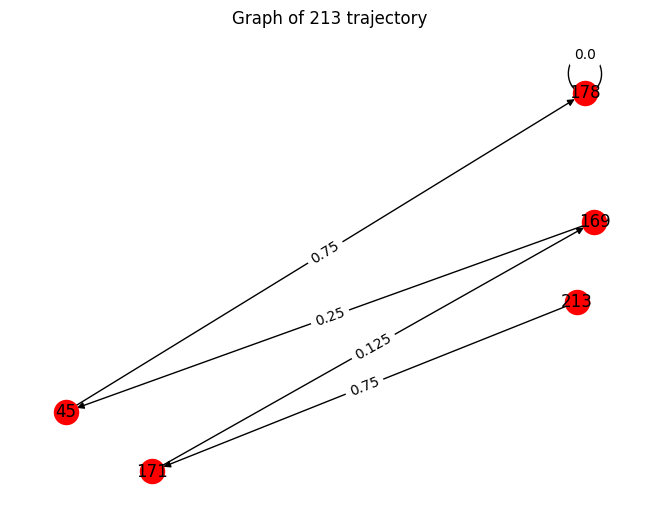

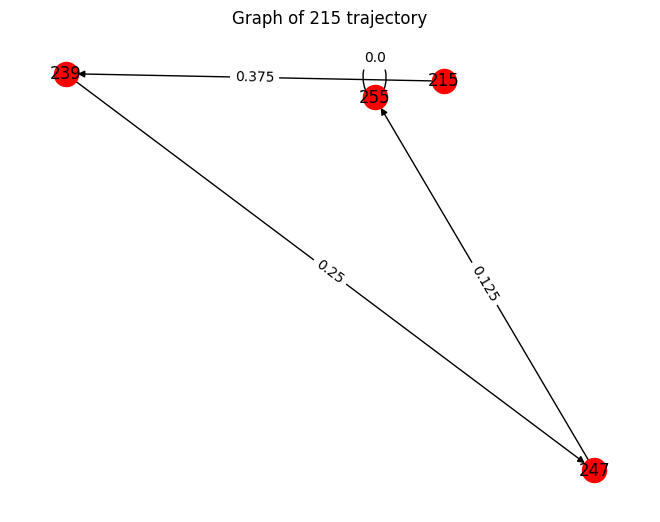

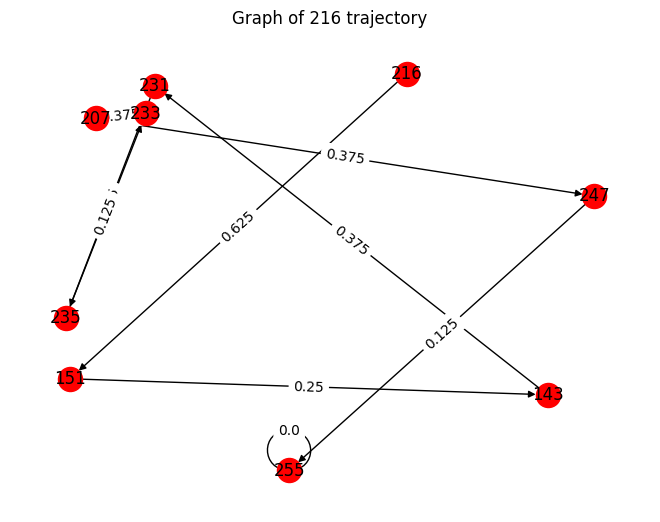

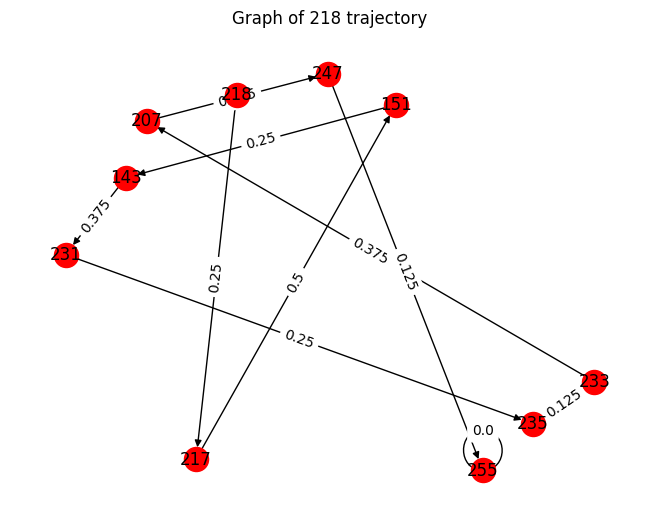

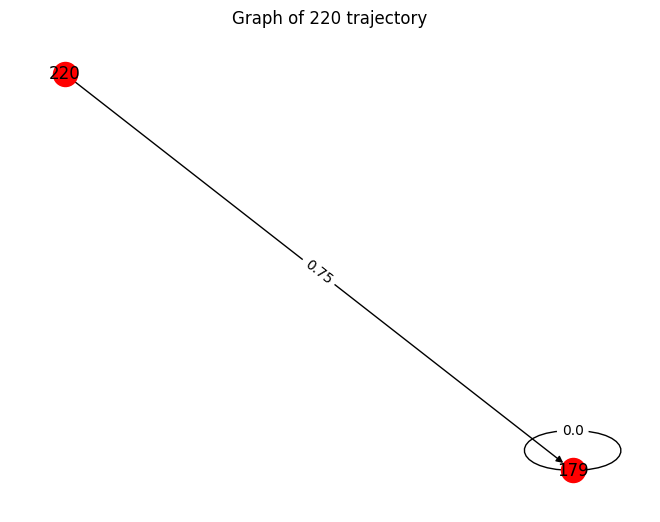

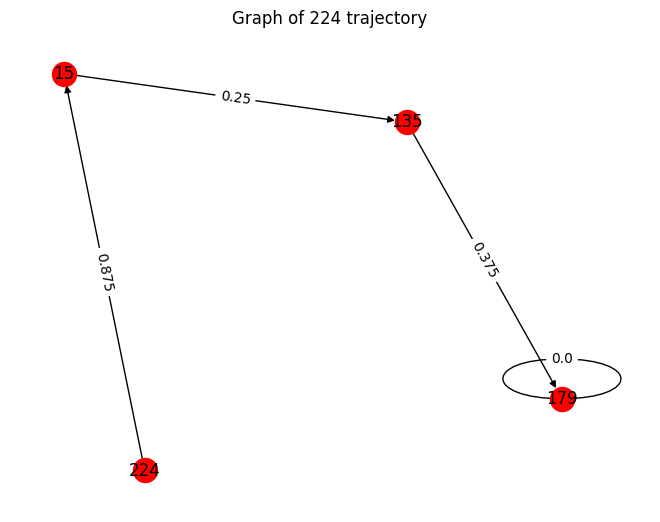

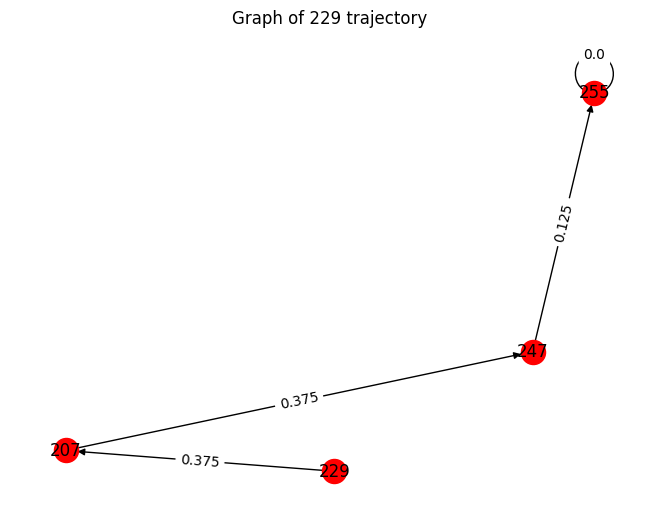

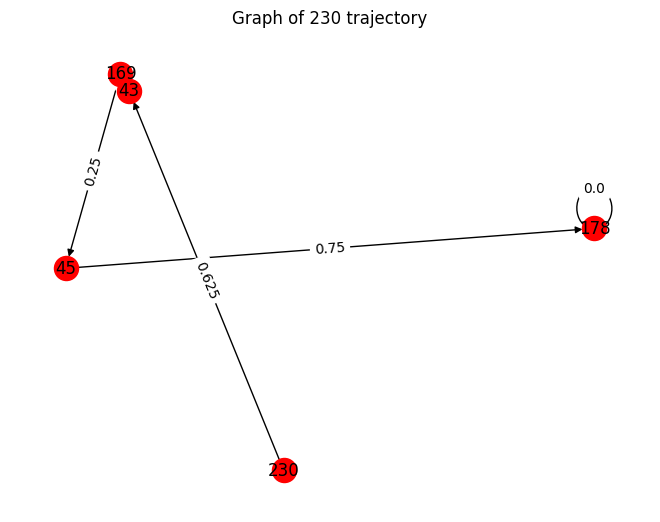

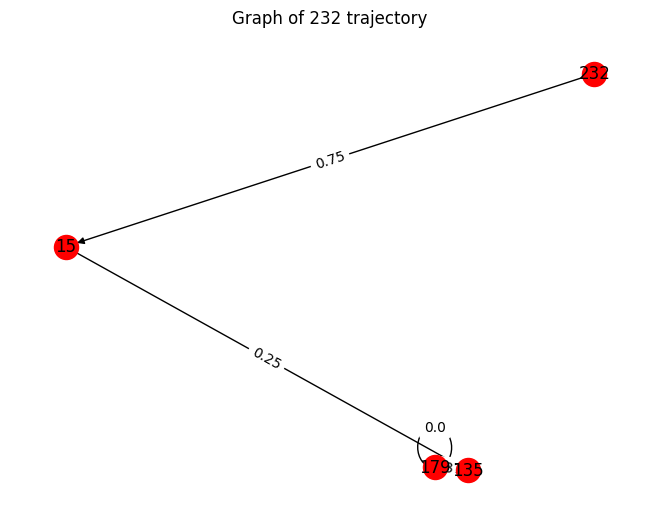

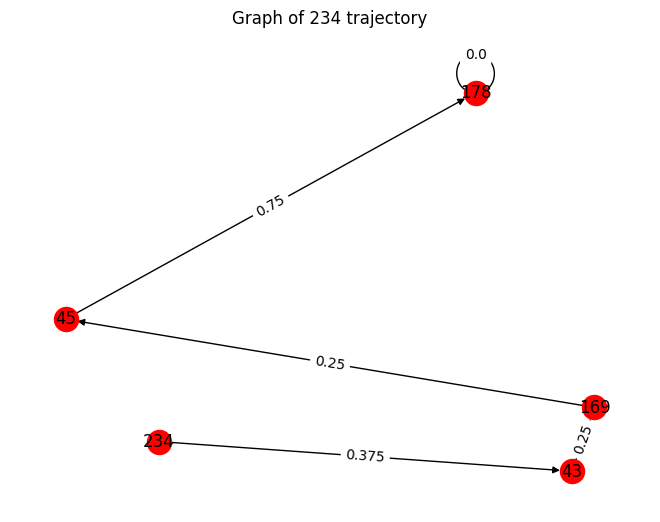

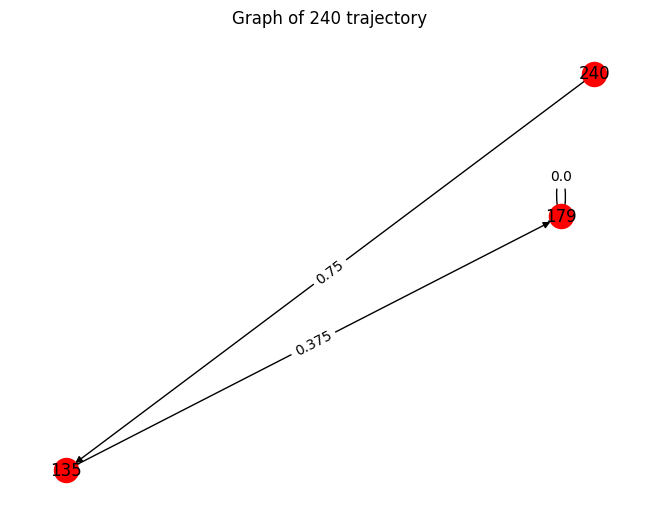

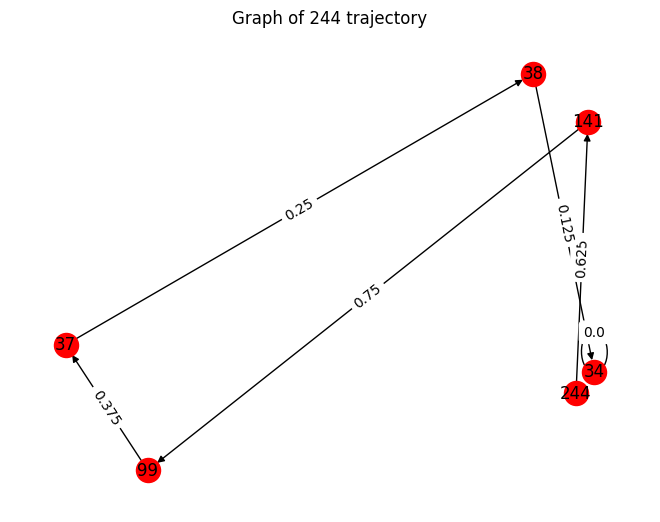

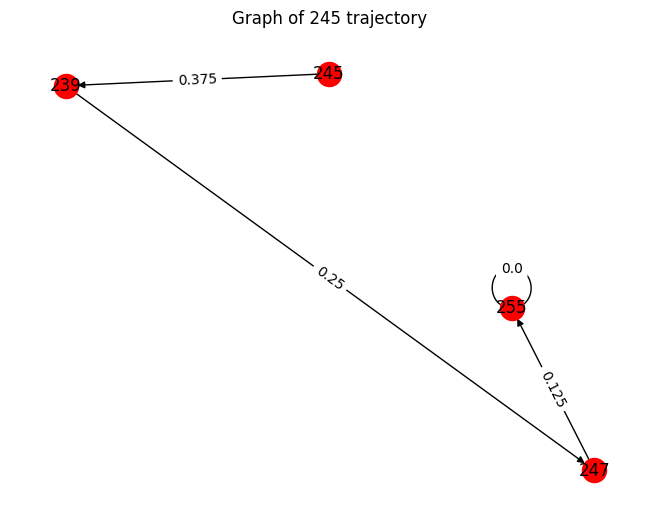

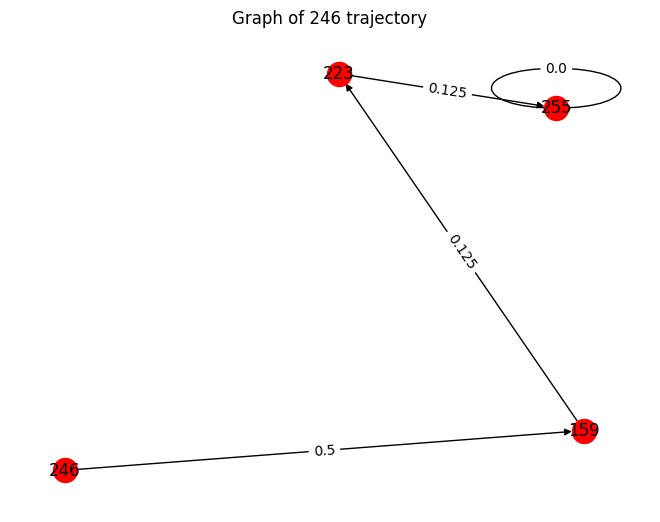

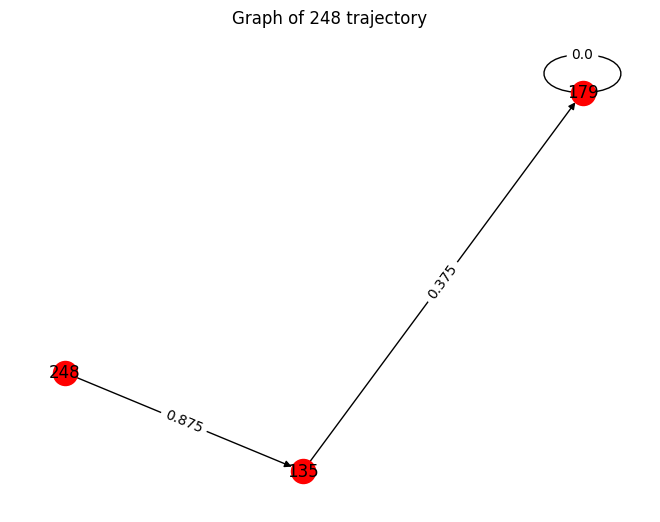

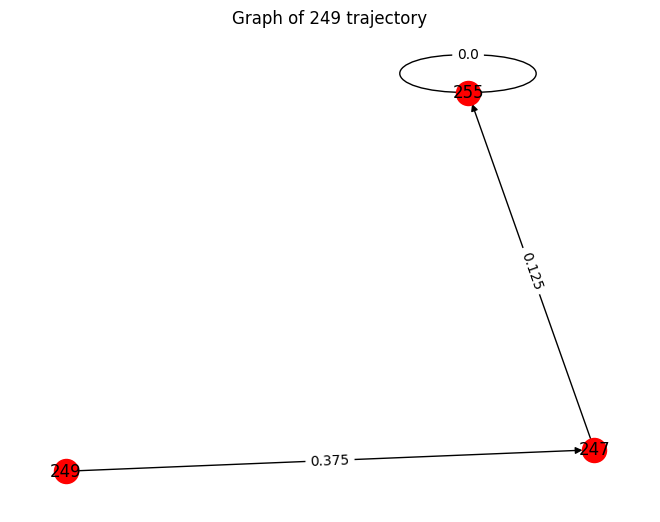

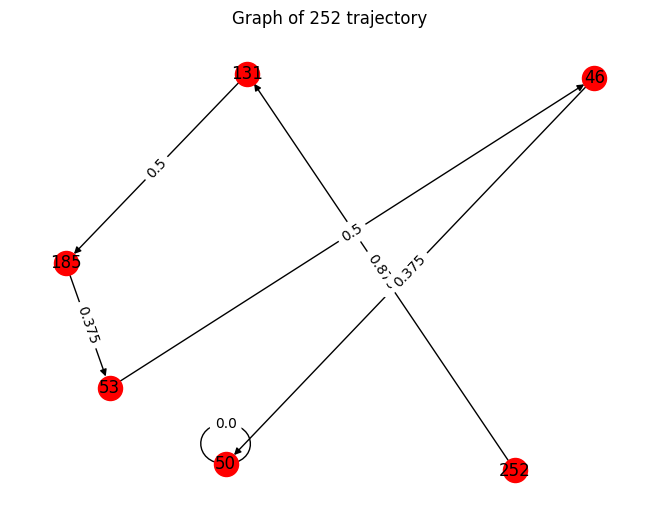

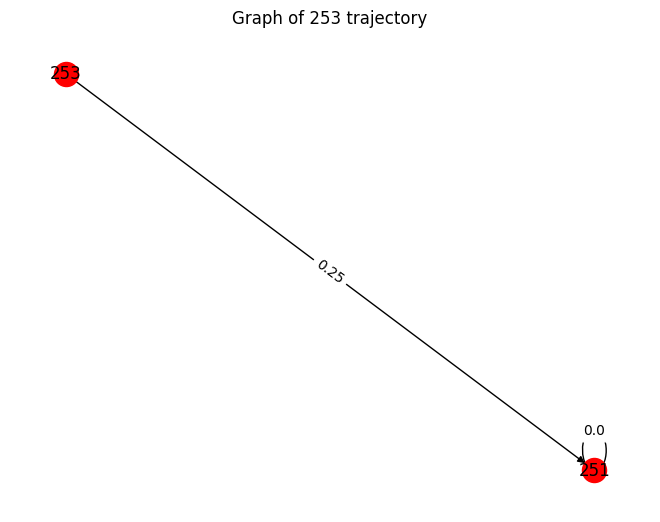

The longest transient length was 13.


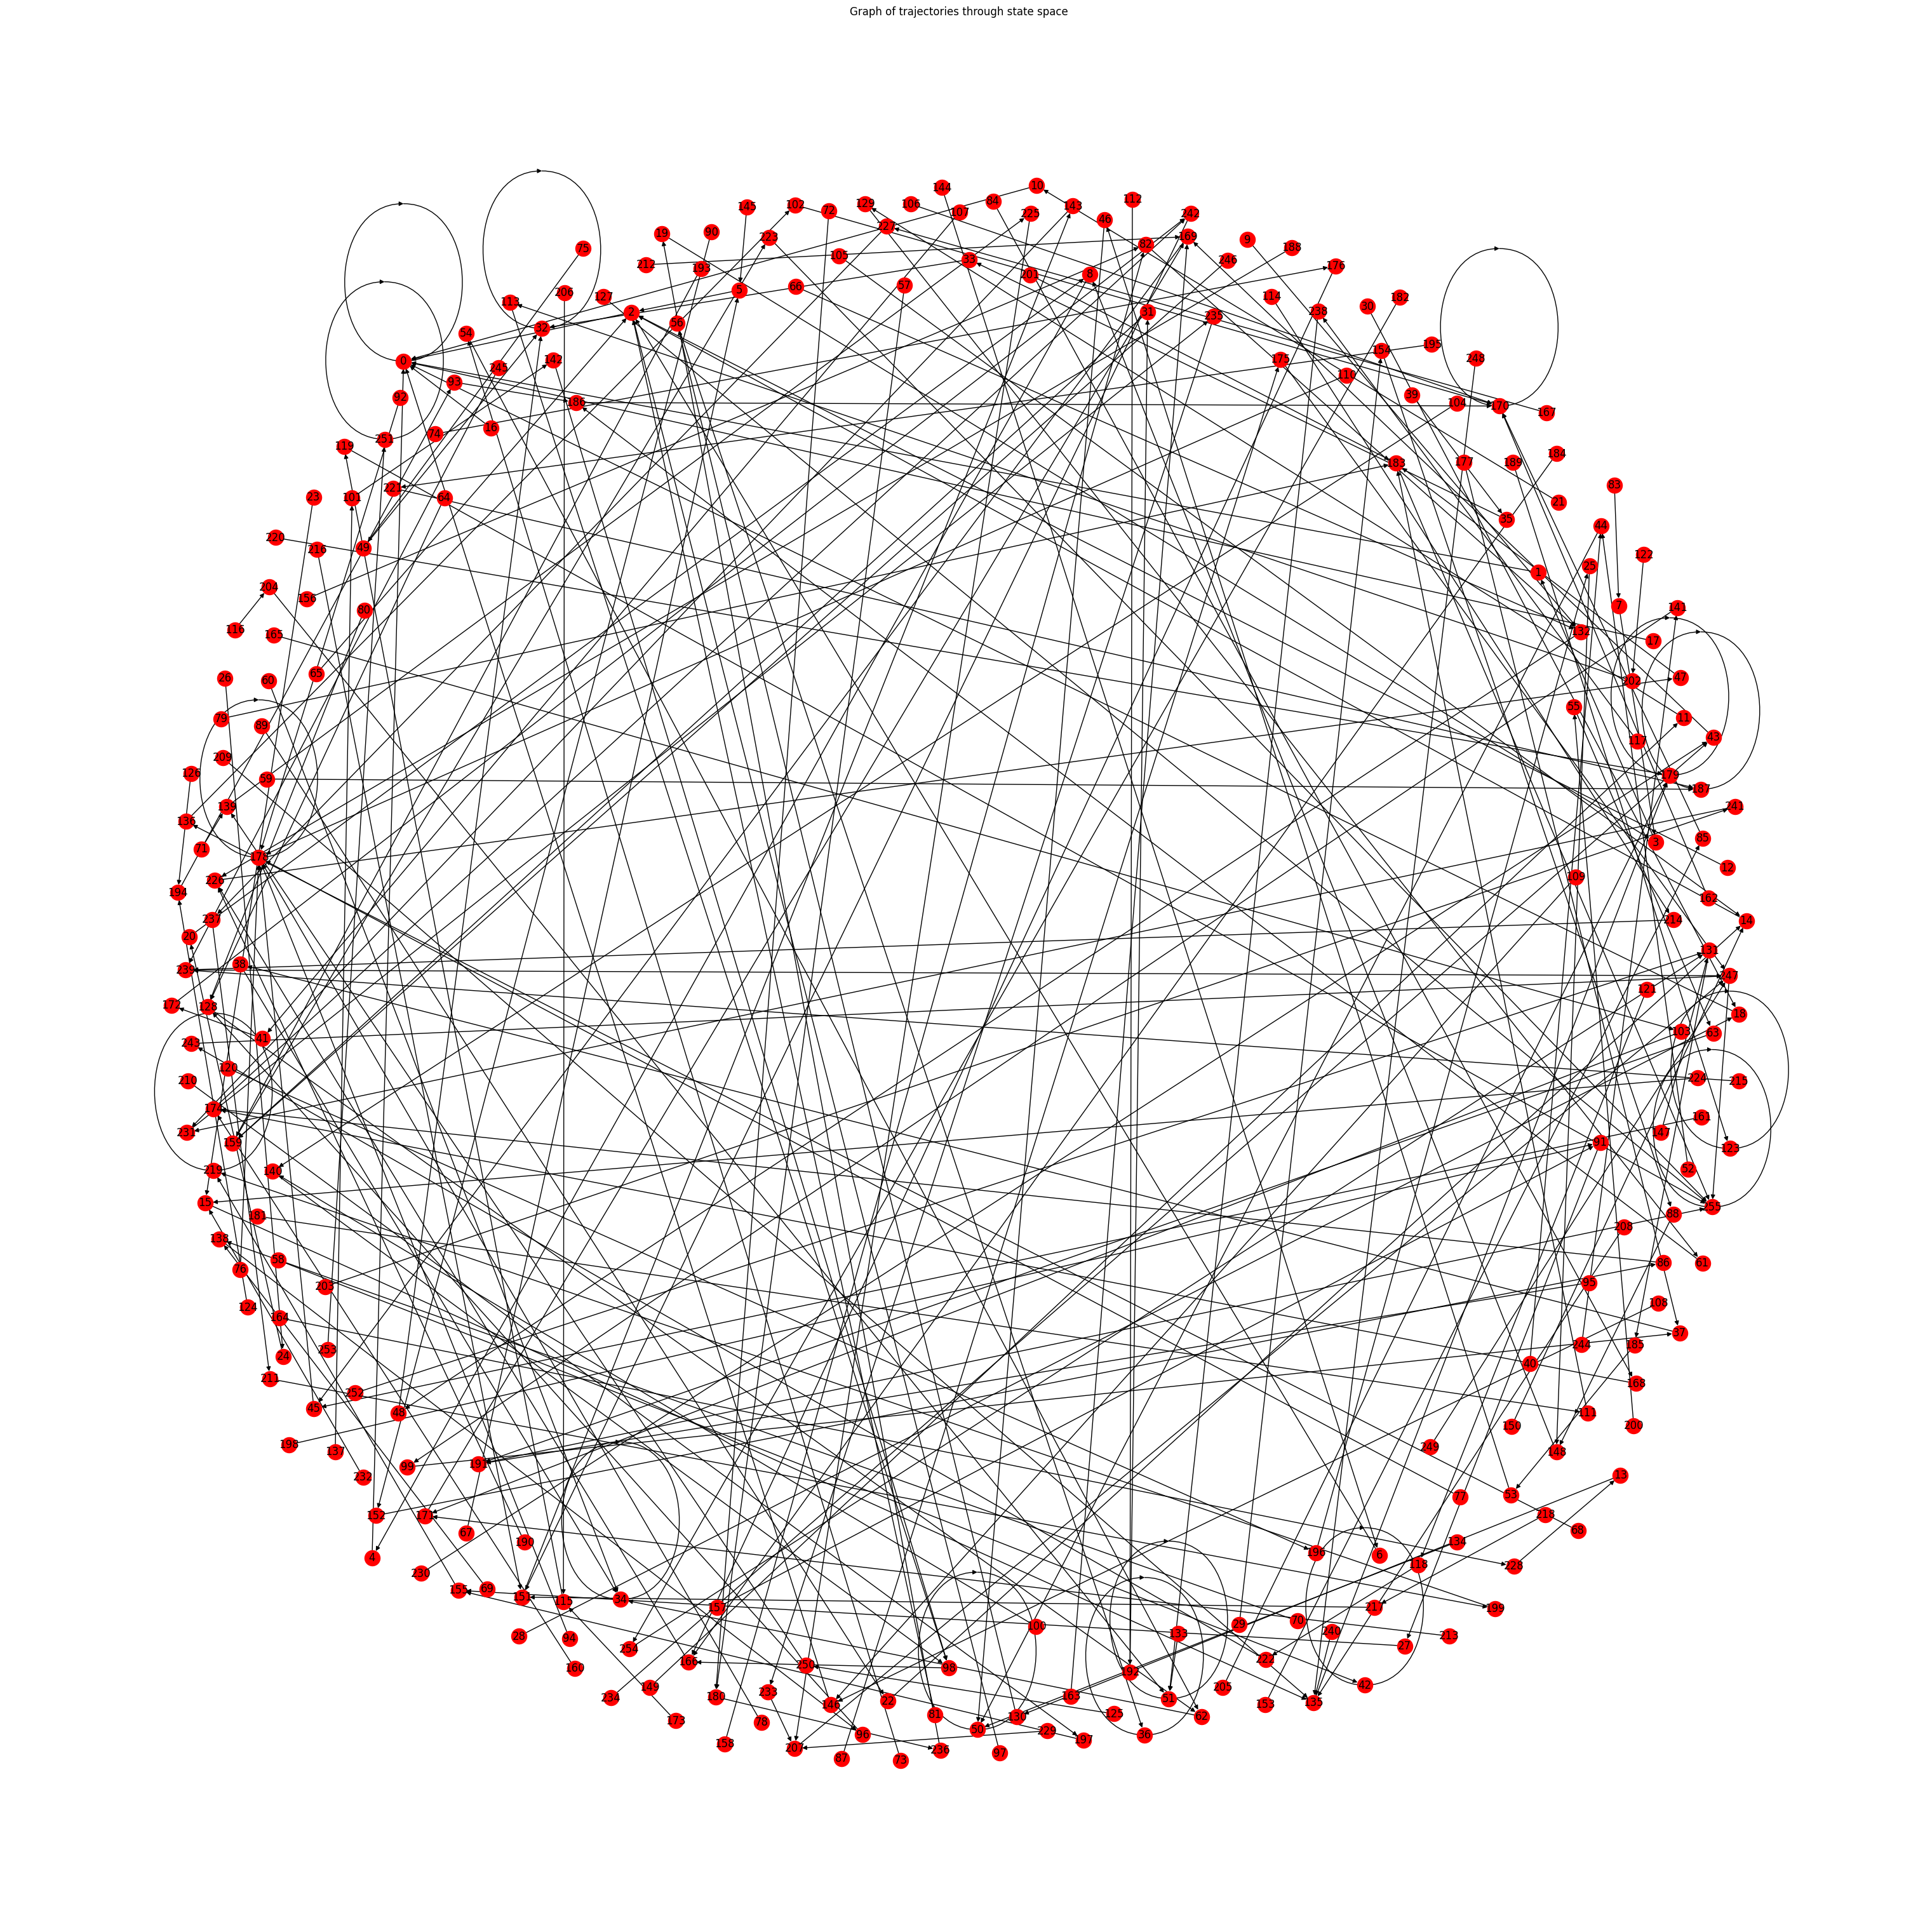

For inital state 9: the transient length was 4
For inital state 12: the transient length was 3
For inital state 16: the transient length was 2
For inital state 17: the transient length was 2
For inital state 21: the transient length was 3
For inital state 23: the transient length was 4
For inital state 26: the transient length was 6
For inital state 28: the transient length was 3
For inital state 29: the transient length was 7
For inital state 30: the transient length was 3
For inital state 39: the transient length was 4
For inital state 40: the transient length was 3
For inital state 52: the transient length was 3
For inital state 57: the transient length was 7
For inital state 58: the transient length was 2
For inital state 59: the transient length was 2
For inital state 60: the transient length was 2
For inital state 64: the transient length was 4
For inital state 65: the transient length was 3
For inital state 66: the transient length was 4
For inital state 67: the transient length

In [13]:
testSetOfInputs ={9, 12}

iterateTheRCAThroughAllTheGivenStartingPoints(setOfGardenOfEdens)